In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
import numpy as np


#### Objective: 
Aim of this study is to analyse the credit data of Gold Atlantis,
to explore the driving factors behind the loan default, i.e. the variables which are strong indicators of default.   
Further, the company can utilise this knowledge for its portfolio and risk assessment with respect to loan sanctions.

Criteria for Analysis:

A] Direct Factors

1. The borrower’s capacity to repay the loan  -cash inflow relative to debt.

2. This factor is all about assessing the net worth/assets of the individual who has applied for a loan -cash reserves.

3. The borrower’s history of repayments.

B] Indirect Factors

1. Level of education
2. Family status of the client
3. Occupation of the client.
4. How many days before the application the person started current employment.
5. Number of documents submitted during loan.
6. How many family members/children does client have.
    


In [2]:
# reading the file into a dataframe

df=pd.read_csv('DS1_C5_S4_Credit_Data_Hackathon.csv')

In [3]:
print(df.shape)

(100000, 24)


In [4]:
# Defining a function to identify the datatypes of columns as categorical or numerical. Seperate them in two lists.

def datatype(dframe):
    #all numerical cols
    num = df.select_dtypes(exclude='object').columns
    
    #all categorical cols
    cat = df.select_dtypes(include='object').columns

    return(num,cat)
num,cat= datatype(df)

print('Numerical columns: \n',num.tolist())
print('\n\nCategorical columns: \n',cat.tolist())

Numerical columns: 
 ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE', 'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'TOTAL_DOC_SUBMITTED']


Categorical columns: 
 ['NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'APPLICATION_DAY']


In [5]:
# Step 2: Perform descriptive analysis of categorical columns identified above.

def categorical(col): # categorical function def
    
    print('\nColumn: ', col)
    
    # unique val
    print('Unique Values: ',df[col].unique())
    
    # mode
    print('Mode: ',df[col].mode()[0])
    
    # count missing values
    print('Count of missing values: ',df[col].isnull().sum())
    
for x in cat: categorical(x)


Column:  NAME_CONTRACT_TYPE
Unique Values:  ['Cash loans' 'Revolving loans']
Mode:  Cash loans
Count of missing values:  0

Column:  GENDER
Unique Values:  ['M' 'F' 'XNA']
Mode:  F
Count of missing values:  0

Column:  Car
Unique Values:  ['N' 'Y']
Mode:  N
Count of missing values:  0

Column:  House
Unique Values:  ['Y' 'N']
Mode:  Y
Count of missing values:  0

Column:  NAME_TYPE_SUITE
Unique Values:  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode:  Unaccompanied
Count of missing values:  405

Column:  NAME_INCOME_TYPE
Unique Values:  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode:  Working
Count of missing values:  0

Column:  NAME_EDUCATION_TYPE
Unique Values:  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode:  Secondary / secondary special
Count of missing values:  0

Column:  NAME_F

_GENDER column needs to be checked for 'XNA' value._  

In [6]:
# Step 3: Perform descriptive analysis on numerical cols, by creating a function.
# central tendency, std. deviation, missing values, skewness.

def numerical(col):
     
    print('\nColumn: ', col)
    
    #mean
    #print('mean: ',df[col].mean())
    
    #median
    #print('median: ',round(df[col].median(),2))
    
    #mode
    print('mode: ',df[col].mode()[0])
    
    #sd
    #print(f'std deviation: {round(df[col].std(),2)}')

    #skew
    #print(f'skewness: {df[col].skew().round(2)}')
    
    # count missing values
    #print('Count of missing values: ',df[col].isnull().sum())
     
    print(df[col].head(2))
    
for x in num[1:-1]:
    #if x not in (['AMT_CREDIT','AMT_INCOME_TOTAL','DAYS_EMPLOYED','AMT_GOODS_PRICE']): 
    numerical(x)



Column:  TARGET
mode:  0
0    1
1    0
Name: TARGET, dtype: int64

Column:  CNT_CHILDREN
mode:  0
0    0
1    0
Name: CNT_CHILDREN, dtype: int64

Column:  AMT_INCOME_TOTAL
mode:  135000.0
0    202500.0
1    270000.0
Name: AMT_INCOME_TOTAL, dtype: float64

Column:  AMT_CREDIT
mode:  450000.0
0     406597.5
1    1293502.5
Name: AMT_CREDIT, dtype: float64

Column:  AMT_GOODS_PRICE
mode:  450000.0
0     351000.0
1    1129500.0
Name: AMT_GOODS_PRICE, dtype: float64

Column:  DAYS_EMPLOYED
mode:  365243
0    -637
1   -1188
Name: DAYS_EMPLOYED, dtype: int64

Column:  MOBILE
mode:  1
0    1
1    1
Name: MOBILE, dtype: int64

Column:  WORK_PHONE
mode:  1
0    1
1    1
Name: WORK_PHONE, dtype: int64

Column:  HOME_PHONE
mode:  0
0    0
1    0
Name: HOME_PHONE, dtype: int64

Column:  MOBILE_REACHABLE
mode:  1
0    1
1    1
Name: MOBILE_REACHABLE, dtype: int64

Column:  FLAG_EMAIL
mode:  0
0    0
1    0
Name: FLAG_EMAIL, dtype: int64

Column:  CNT_FAM_MEMBERS
mode:  2.0
0    1.0
1    2.0
Name: CN

_Flag Columns FLAG_EMAIL, MOBILE_REACHABLE, HOME_PHONE, WORK_PHONE, MOBILE: change values to more meaningful Yes/No_
_DAYS_EMPLOYED has negative values._

In [7]:
# DF details

print('Column names: \n',df.columns)
print(df.info(null_counts=True,verbose=True))
print('\n\nColumn count of missing values: \n',df.isna().sum())  # no null handling required


# Interpretation:  
# There are 3 object type columns, and rest are integer.
# There are no null values in any columns

Column names: 
 Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CN

In [8]:
# check statistics summary
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,9.991900e+04,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000
mean,158006.140860,0.080930,0.417390,1.694261e+05,5.990034e+05,5.383451e+05,63292.222060,0.999990,0.82128,0.199740,0.997990,0.056190,2.155672,0.931210
std,33481.166996,0.272729,0.721014,3.835007e+05,4.020520e+05,3.693977e+05,140839.697296,0.003162,0.38312,0.399807,0.044788,0.230289,0.908897,0.343917
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.500000e+04,-17531.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129076.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-2758.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,157877.000000,0.000000,0.000000,1.440000e+05,5.130405e+05,4.500000e+05,-1219.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,186982.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-291.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216090.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,4.050000e+06,365243.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14.000000,4.000000


In [9]:
# Columns which have missing values

(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

temp = df.columns[(df.isnull().sum()/len(df)*100)>0]
temp

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS'],
      dtype='object')

### Handing Null values/Outliers.

1. AMT_GOODS_PRICE

In [10]:
df[df['AMT_GOODS_PRICE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,NaN,...,-381,1,1,1,1,0,Core staff,4.0,WEDNESDAY,1
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,NaN,...,-2921,1,1,1,1,1,Private service staff,2.0,SATURDAY,1
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,NaN,...,-2712,1,1,1,1,0,Accountants,2.0,WEDNESDAY,0
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,NaN,...,-899,1,1,1,1,0,Managers,3.0,WEDNESDAY,1
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,NaN,...,-1847,1,1,1,1,0,Security staff,1.0,SATURDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89085,203438,0,Revolving loans,F,N,Y,1,157500.0,270000.0,NaN,...,-1471,1,1,1,1,0,Accountants,2.0,TUESDAY,0
89698,204141,0,Revolving loans,F,N,Y,0,67500.0,202500.0,NaN,...,-1496,1,1,0,1,0,Core staff,1.0,FRIDAY,1
90898,205537,0,Revolving loans,M,N,Y,0,81000.0,180000.0,NaN,...,-4231,1,1,1,1,0,Laborers,2.0,FRIDAY,1
96192,211675,0,Revolving loans,F,N,Y,3,90000.0,135000.0,NaN,...,-1579,1,1,1,1,0,NaN,5.0,WEDNESDAY,1


In [11]:
print(df[df['AMT_GOODS_PRICE'].isnull()].NAME_CONTRACT_TYPE.unique())   

['Revolving loans']


AMT_GOODS_PRICE is null, for NAME_CONTRACT_TYPE='Revolving loans' only.

count      99919.0
mean      538345.0
std       369398.0
min        45000.0
50%       450000.0
99%      1800000.0
max      4050000.0
Name: AMT_GOODS_PRICE, dtype: float64



<Axes: xlabel='AMT_GOODS_PRICE'>

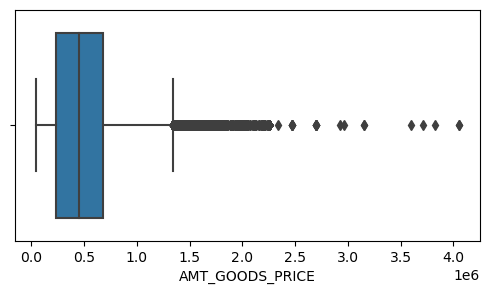

In [12]:
# checking outliers using statistics and box plot
print(df['AMT_GOODS_PRICE'].describe(percentiles=[.5,.99]).round(0))
print()
plt.figure(figsize=[6,3])
sb.boxplot(x=df['AMT_GOODS_PRICE'])

_1. Boxplot shows outliers. Max is also very far from 99%ile. But they maybe valid prices of goods._  
_2. AMT_GOODS_PRICE: Imputing 81 missing values with median_

In [13]:
print(df['AMT_GOODS_PRICE'].isnull().sum())
df['AMT_GOODS_PRICE']=df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median())
print(df['AMT_GOODS_PRICE'].isnull().sum())

81
0


2. NAME_TYPE_SUITE

In [14]:
print(df['NAME_TYPE_SUITE'].value_counts())
print('\n',df['NAME_TYPE_SUITE'].mode()[0])

Unaccompanied      80789
Family             13102
Spouse, partner     3704
Children            1072
Other_B              556
Other_A              287
Group of people       85
Name: NAME_TYPE_SUITE, dtype: int64

 Unaccompanied


_NAME_TYPE_SUITE: Imputing 405 missing values with mode, as it is a categorical column._  
_Imputing the values with mode value._

In [15]:
print(df['NAME_TYPE_SUITE'].isnull().sum())
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0])
print(df['NAME_TYPE_SUITE'].isnull().sum())

405
0


3. OCCUPATION_TYPE

In [16]:
print(df['OCCUPATION_TYPE'].value_counts())
print('\n',df['OCCUPATION_TYPE'].mode()[0])

Laborers                 17977
Sales staff              10383
Core staff                8952
Managers                  6969
Drivers                   6057
High skill tech staff     3650
Accountants               3258
Medicine staff            2851
Security staff            2201
Cooking staff             1954
Cleaning staff            1512
Private service staff      863
Low-skill Laborers         705
Waiters/barmen staff       437
Secretaries                415
Realty agents              242
HR staff                   181
IT staff                   169
Name: OCCUPATION_TYPE, dtype: int64

 Laborers


_OCCUPATION_TYPE: Imputing 31224 missing values with mode can couse data distortion_  
_Hence we can add new value: 'unknown' in place of blanks_    

In [17]:
print(df['OCCUPATION_TYPE'].isnull().sum())
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('unknown')
print(df['OCCUPATION_TYPE'].isnull().sum())

31224
0


In [18]:
#sb.countplot(data=df,y='OCCUPATION_TYPE')

4. CNT_FAM_MEMBERS

In [19]:
# nulls
df[df['CNT_FAM_MEMBERS'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,450000.0,...,-1161,1,1,1,1,0,Managers,NaN,THURSDAY,1


count    99999.0
mean         2.0
std          1.0
min          1.0
50%          2.0
99%          5.0
max         14.0
Name: CNT_FAM_MEMBERS, dtype: float64



<Axes: xlabel='CNT_FAM_MEMBERS'>

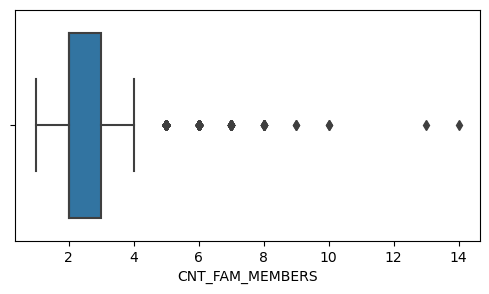

In [20]:
# checking outliers using statistics and box plot
print(df['CNT_FAM_MEMBERS'].describe(percentiles=[.5,.99]).round(0))
print()
plt.figure(figsize=[6,3])
sb.boxplot(x=df['CNT_FAM_MEMBERS'])

Observations:  
_1. Boxplot shows outliers. Max is also very far from 99%ile. But they maybe valid values as it is normal for a family to have upto 14 members._  
_2. CNT_FAM_MEMBERS: deleting the row as count is less._

In [21]:
print(df['CNT_FAM_MEMBERS'].isnull().sum())
df['CNT_FAM_MEMBERS']=df['CNT_FAM_MEMBERS'].isnull().dropna()
print(df['CNT_FAM_MEMBERS'].isnull().sum())

1
0


_5. Gender_

In [22]:
print(df['GENDER'].value_counts())

F      65855
M      34142
XNA        3
Name: GENDER, dtype: int64


_We can drop these values_

In [23]:
print(df[df['GENDER']=='XNA'].shape[0])
df=df[df['GENDER'].str.strip() !='XNA']
print(df[df['GENDER']=='XNA'].shape[0])

3
0


6. DAYS_EMPLOYED

In [24]:
#taking absolute of negative values
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x<0 else x)

In [25]:
# converting to years

df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: x//365)
df['DAYS_EMPLOYED'].describe()

count    99997.000000
mean       183.615288
std        380.796728
min          0.000000
25%          2.000000
50%          6.000000
75%         15.000000
max       1000.000000
Name: DAYS_EMPLOYED, dtype: float64

1000    17865
1       10390
2        9571
0        9131
3        8127
Name: DAYS_EMPLOYED, dtype: int64


<Axes: xlabel='DAYS_EMPLOYED'>

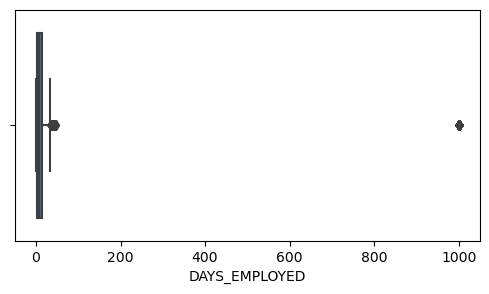

In [26]:
print(df['DAYS_EMPLOYED'].value_counts().head())
plt.figure(figsize=[6,3])
sb.boxplot(data=df,x='DAYS_EMPLOYED')

In [27]:
df[df['DAYS_EMPLOYED']==1000]['NAME_INCOME_TYPE'].unique()

array(['Pensioner', 'Unemployed'], dtype=object)

_It can be a filler value for INCOME_TYPE 'Pensioner' & 'Unemployed'

7. Flag Columns FLAG_EMAIL, MOBILE_REACHABLE, HOME_PHONE, WORK_PHONE, MOBILE:   change values to more meaningful Yes/No

In [28]:
list = ['FLAG_EMAIL', 'MOBILE_REACHABLE', 'HOME_PHONE', 'WORK_PHONE', 'MOBILE']
for i in list: 
    df[i] = df[i].map({1:'Yes',0:'No'})

8. NAME_FAMILY_STATUS 

In [29]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 64055
Single / not married    14571
Civil marriage           9769
Separated                6347
Widow                    5254
Unknown                     1
Name: NAME_FAMILY_STATUS, dtype: int64

_Unknown status has 1 row, it can be changed to Married, wont make a difference_

In [30]:
df['NAME_FAMILY_STATUS']=df['NAME_FAMILY_STATUS'].apply(lambda x:'Married' if x.strip()=='Unknown' else x)
df['NAME_FAMILY_STATUS'].value_counts()

Married                 64056
Single / not married    14571
Civil marriage           9769
Separated                6347
Widow                    5254
Name: NAME_FAMILY_STATUS, dtype: int64

## Data Analysis

In [31]:
# Defining a function to identify the datatypes of columns as categorical or numerical. Seperate them in two lists.

def datatype(dframe):
    #all numerical cols
    num = df.select_dtypes(exclude='object').columns
    
    #all categorical cols
    cat = df.select_dtypes(include='object').columns

    return(num,cat)
num,cat= datatype(df)

print('Numerical columns: \n',num.tolist())
print('\n\nCategorical columns: \n',cat.tolist())

Numerical columns: 
 ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'TOTAL_DOC_SUBMITTED']


Categorical columns: 
 ['NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'MOBILE', 'WORK_PHONE', 'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'APPLICATION_DAY']


In [32]:
# Generic function to display percentage above bars in graphs.

def per_abv_bar(col,ax):  
    percentage = ((col.value_counts()/col.count())*100).round(2)
    for bars in ax.containers:
        for i, p in enumerate(bars):
            formt=f'{percentage[i]:.1f}%'     
            ax.annotate(formt, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center')   # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
                                                                                               # get_height: returns height of rectange
                

1. checking data for TARGET

Text(0.5, 1.0, 'Default Percentage')

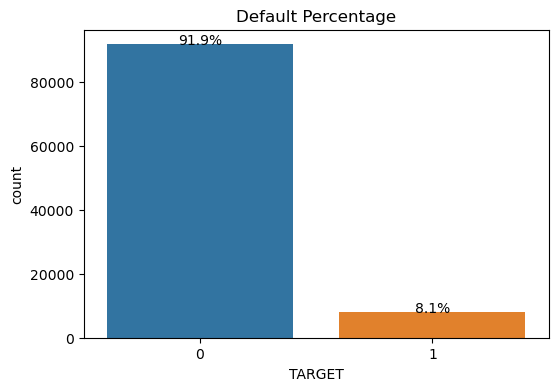

In [33]:
fig, (ax1) = plt.subplots(1, figsize=(6,4))
sb.countplot(data=df,x='TARGET')
per_abv_bar(df['TARGET'],ax1)
plt.title('Default Percentage')

Observations:  
_91.9% of clients don't have payment difficulties._  
_8.1% of clients have payment difficulties._

In [34]:
# splitting dataframes
df_WithoutDiff = df[df['TARGET']==0]
df_WithDiff = df[df['TARGET']==1]

_Univariate Analysis of categorical columns._

In [35]:
for i in cat: 
    print('\nClients with payment difficulties:')
    print(df_WithDiff[i].value_counts().sort_values(ascending=False))
    print('\nClients with no payment difficulties:')
    print(df_WithoutDiff[i].value_counts().sort_values(ascending=False))
    print('*'*40)


Clients with payment difficulties:
Cash loans         7562
Revolving loans     531
Name: NAME_CONTRACT_TYPE, dtype: int64

Clients with no payment difficulties:
Cash loans         82955
Revolving loans     8949
Name: NAME_CONTRACT_TYPE, dtype: int64
****************************************

Clients with payment difficulties:
F    4615
M    3478
Name: GENDER, dtype: int64

Clients with no payment difficulties:
F    61240
M    30664
Name: GENDER, dtype: int64
****************************************

Clients with payment difficulties:
N    5601
Y    2492
Name: Car, dtype: int64

Clients with no payment difficulties:
N    60415
Y    31489
Name: Car, dtype: int64
****************************************

Clients with payment difficulties:
Y    5561
N    2532
Name: House, dtype: int64

Clients with no payment difficulties:
Y    63764
N    28140
Name: House, dtype: int64
****************************************

Clients with payment difficulties:
Unaccompanied      6634
Family             1

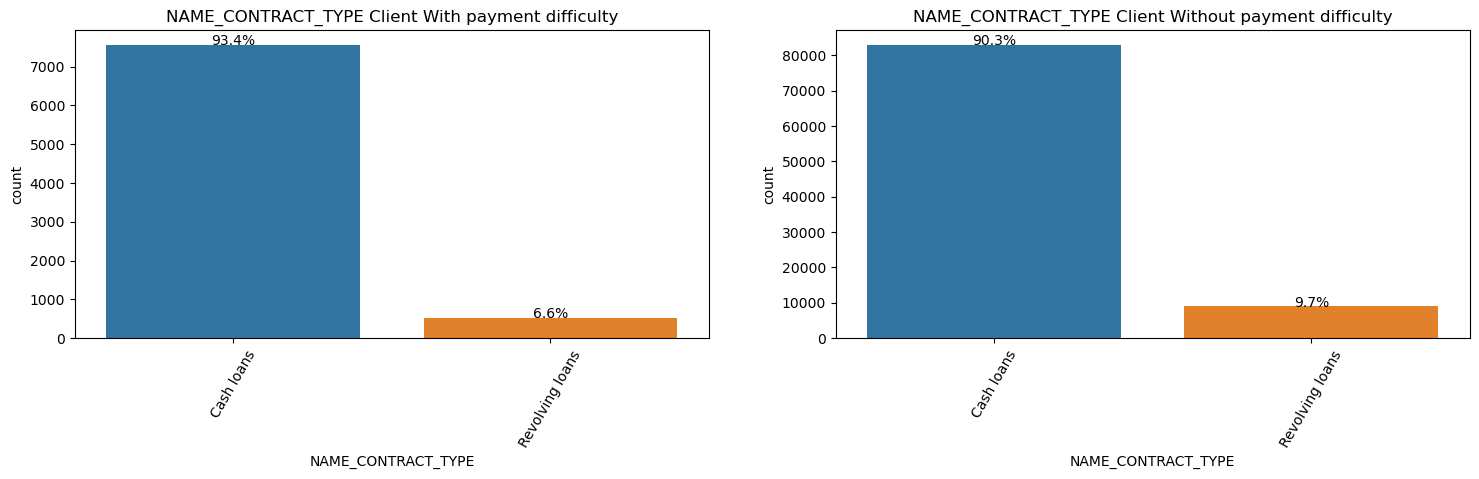

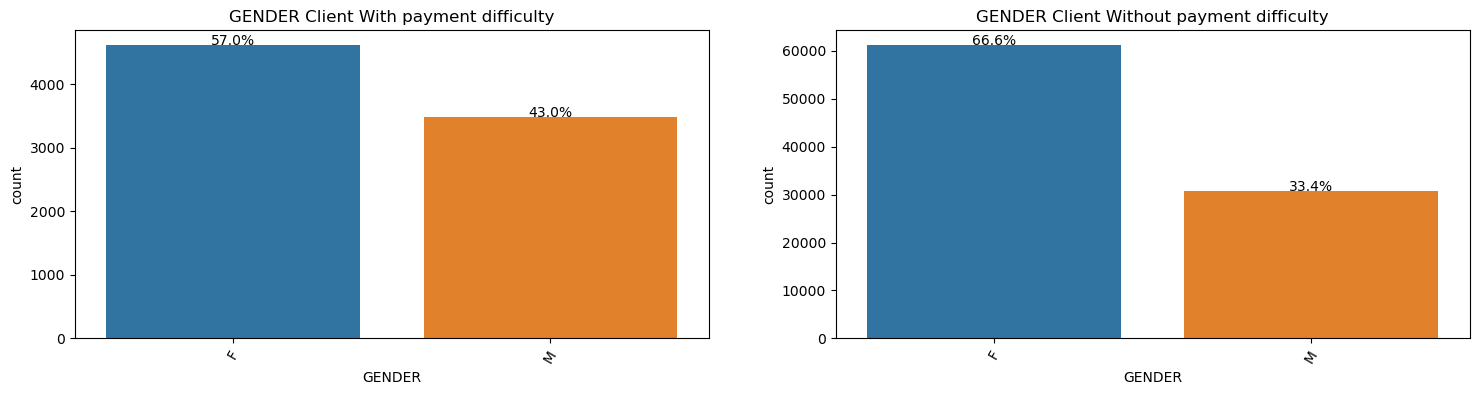

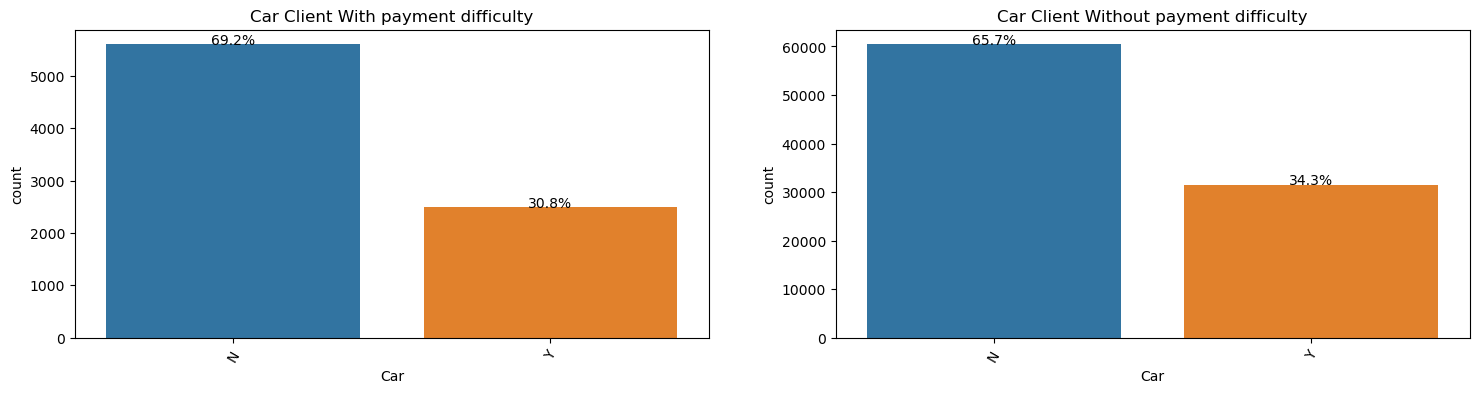

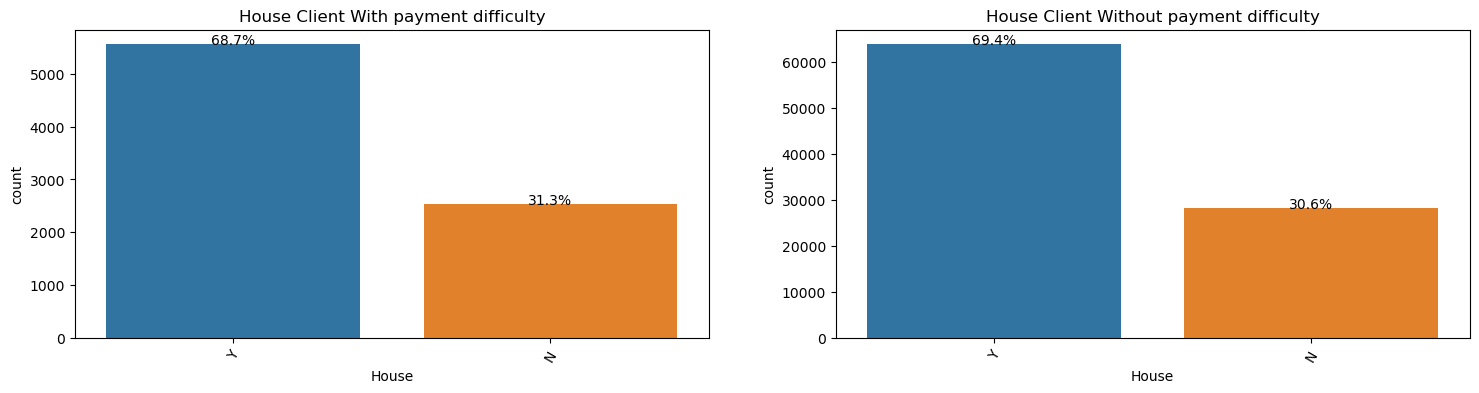

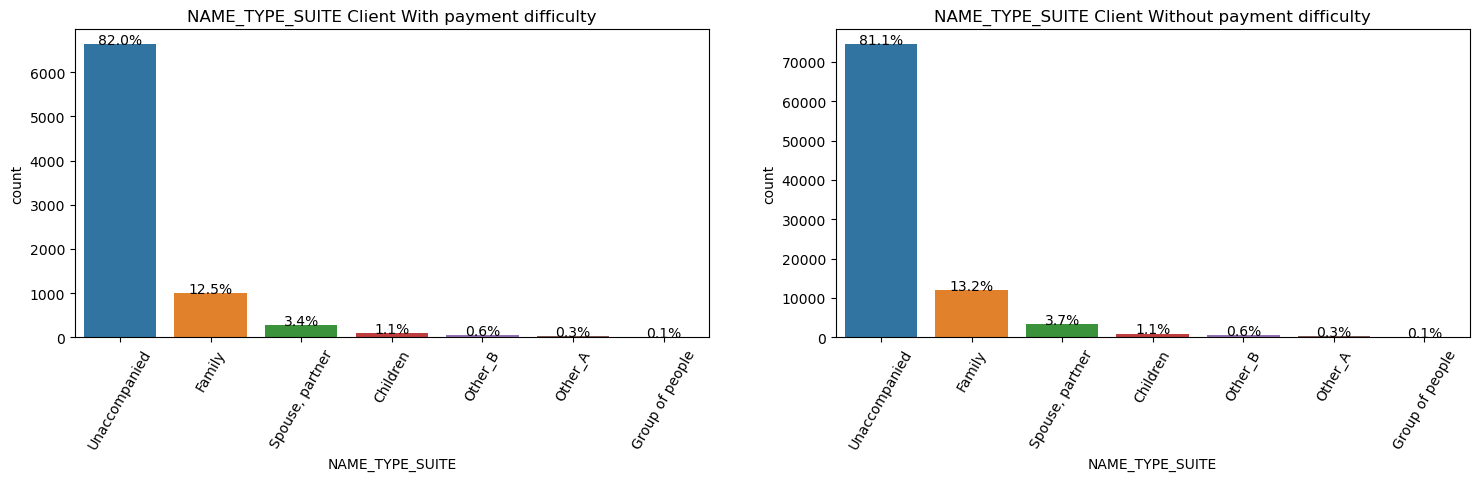

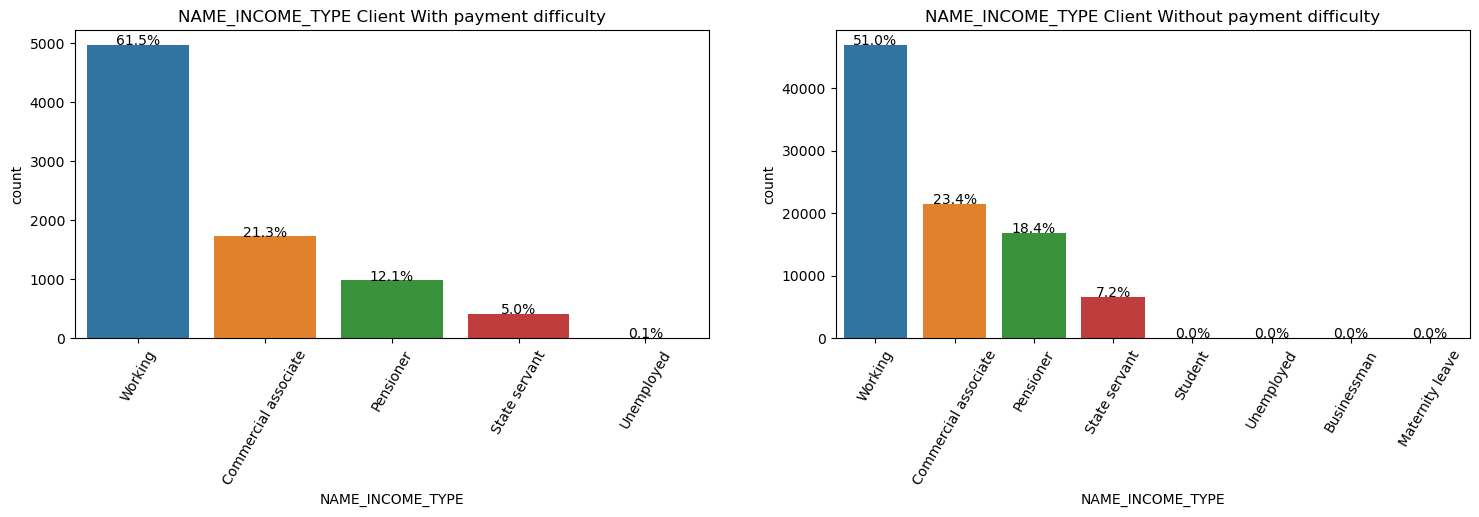

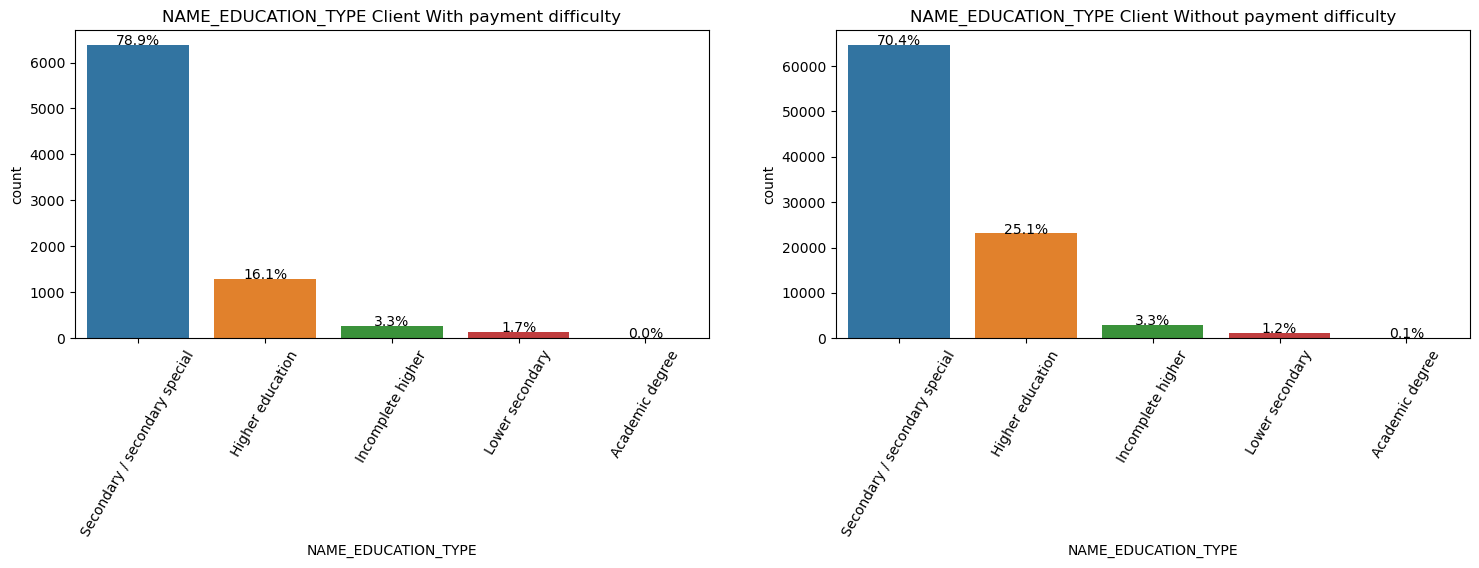

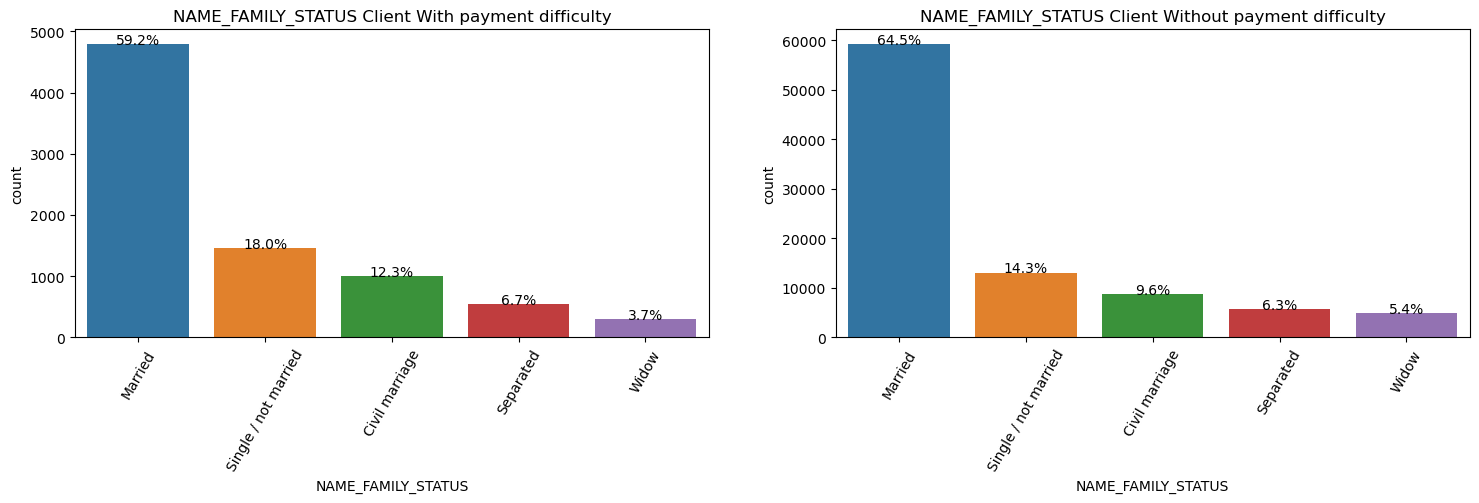

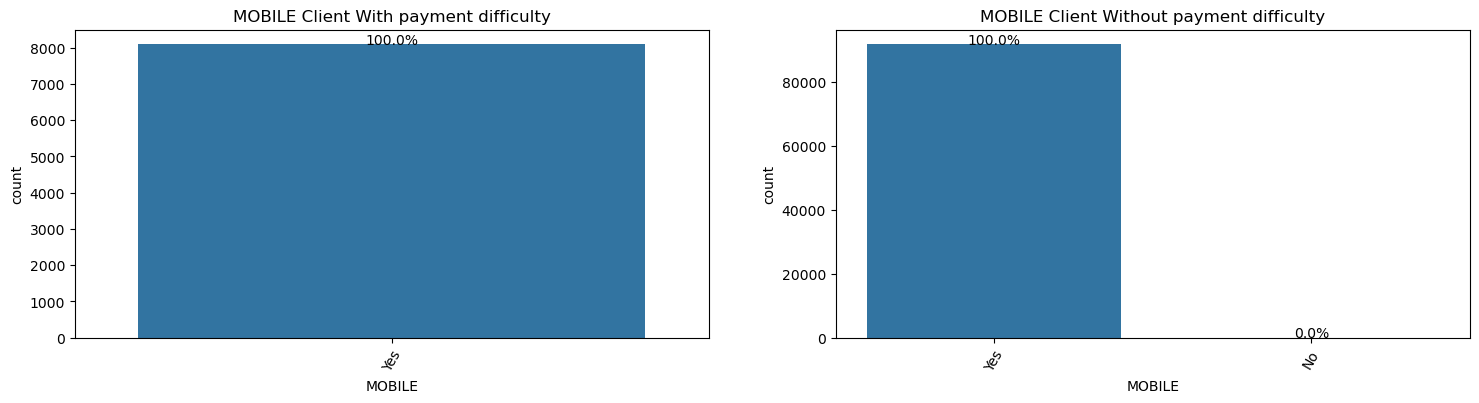

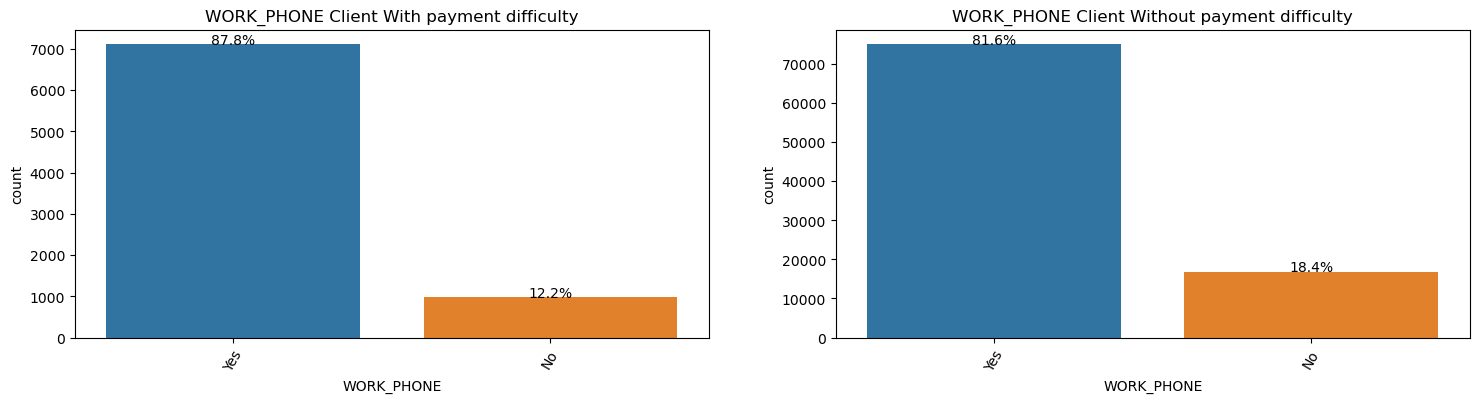

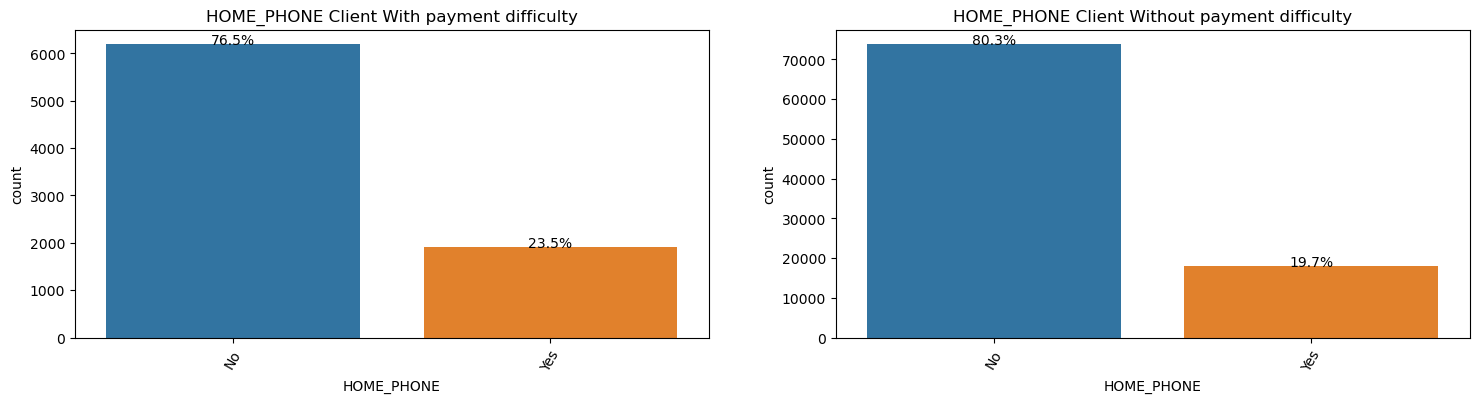

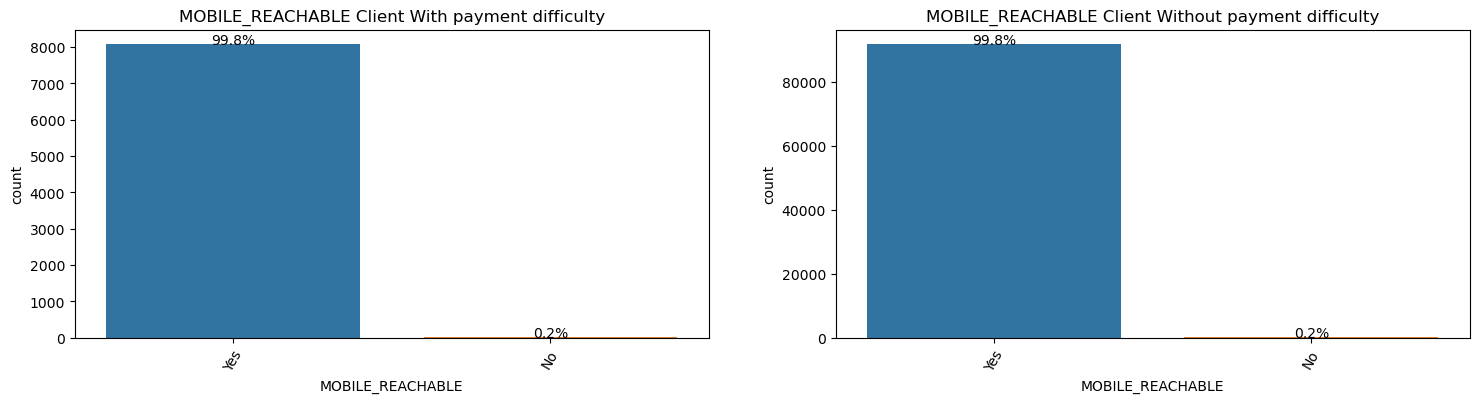

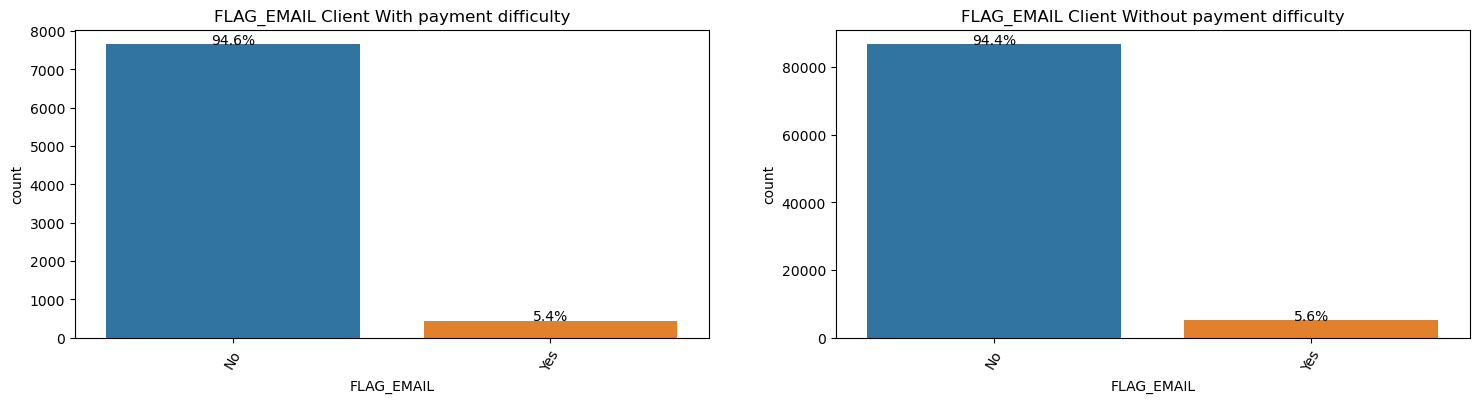

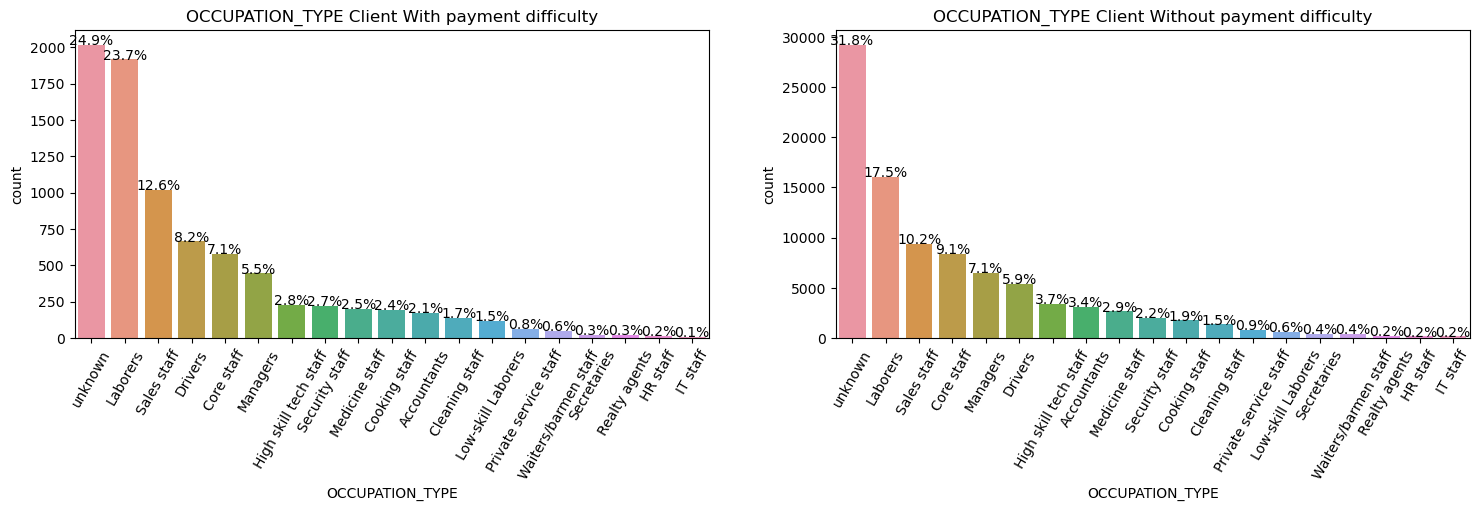

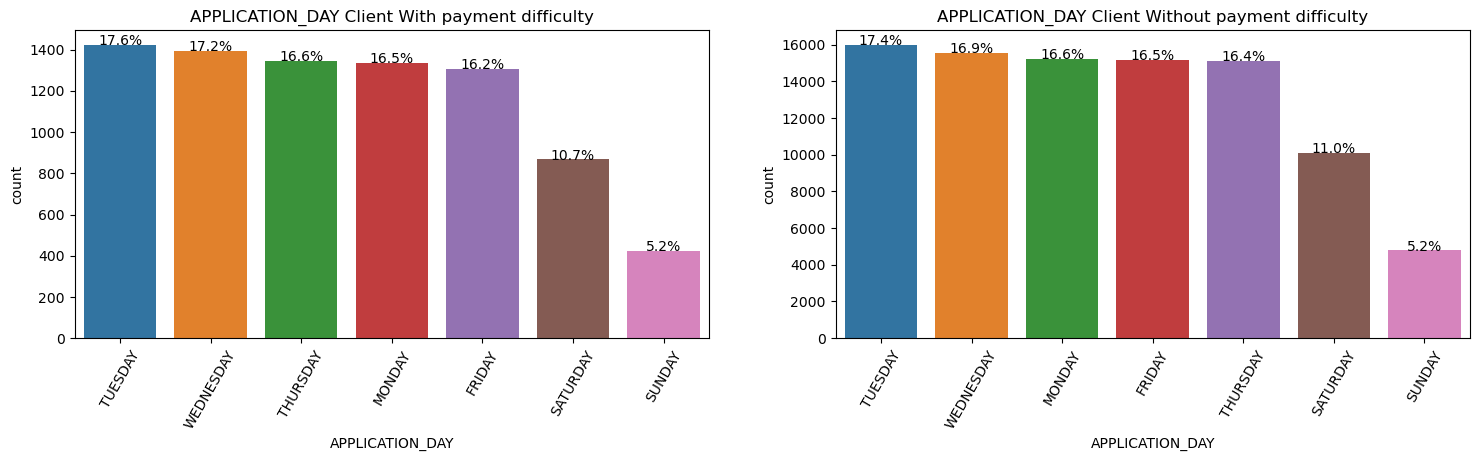

In [36]:
# countplot for categorical values

for i in cat: 
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,4))
    plt.subplot(1,2,1)
    #print(df_WithDiff[i].value_counts())
    plt.title(i+' Client With payment difficulty')
    sb.countplot(x=df_WithDiff[i],ax=ax1,order = df_WithDiff[i].value_counts().index)
    plt.xticks(rotation=60)
    per_abv_bar(df_WithDiff[i],ax1)
    
    plt.subplot(1,2,2)
    #print(df_WithoutDiff[i].value_counts())
    plt.title(i+' Client Without payment difficulty')
    sb.countplot(x=df_WithoutDiff[i],ax=ax2,order = df_WithoutDiff[i].value_counts().index)
    plt.xticks(rotation=60)
    per_abv_bar(df_WithoutDiff[i],ax2)
    plt.show()

Observations:  

-> Cash loans are in greater numbers as compared to Revolving loans.
   Defaulters: 93.4% Cash loans | 6.6% Rev. Loans
   On-Time: 90.3% Cash loans | 9.7% Rev. Loans
   
-> Female loanees are in greater numbers than males.
   Defaulters: 69.2% Females | 30.8% Males
   On-Time: 66.6% Females | 33.4% Males
   
-> Loanees without car are in greater numbers.
   Defaulters: 69.2% Without car | 30.8% With car
   On-Time: 65.7% Without car | 34.3% With car

-> Loanees who own a house are in greater numbers.
   Defaulters: 68.7% house-owners | 31.3% donot own house
   On-Time: 69.4% house-owners| 30.6% donot own house  
   
-> There are more Loanees from Working class as compared to others.
   Pensioners have more on-time payments than payment difficulties.
   Students/Businessmen have less payment difficulties.
   
-> Loanees with higher education have more on-time payments and less payment difficulties.

-> Loanees who are married/ widows have more on-time payments.
   Defaulters: 59% married | 18% single | 3.8% Widow
   On-Time: 64.5% married | 14.3% single | 5.4% Widow
   
-> Loanees who have occupation_type as Labourers have more payment difficulties than on-time payments
   Defaulters: 23.7% Labourers 
   On-Time: 17.5% Labourers


_Univariate Analysis of numerical columns._

In [37]:
# loan application counts, Income_group wise

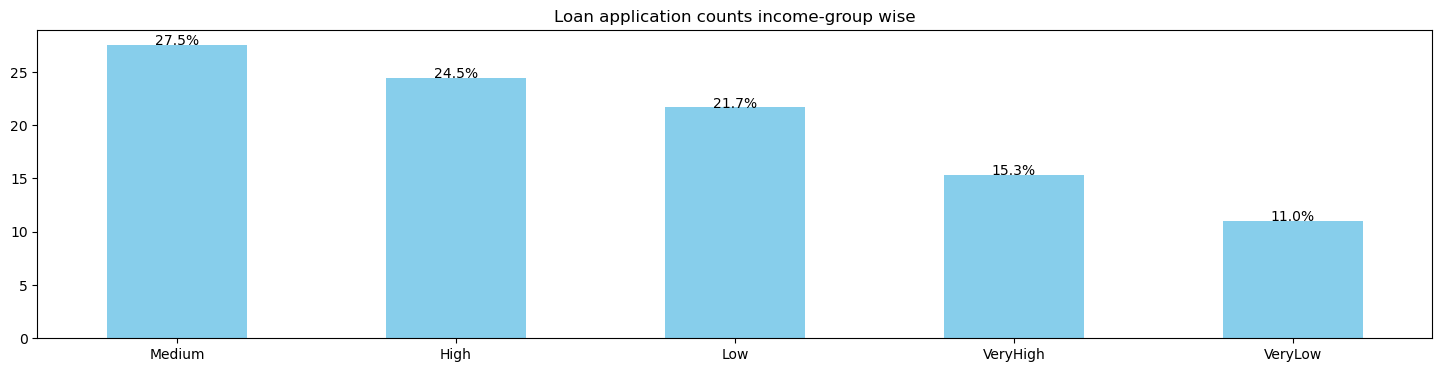

In [38]:
# Displaying loan application counts income-group wise

fig, (ax1) = plt.subplots(1, figsize=(18,4))
df['IncomeGroup']= pd.qcut(df['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.6,0.8,1],    # (quantile-cut): binning a numerical col
                           labels=['VeryLow','Low','Medium','High','VeryHigh'])# to make data easier to handle.

(df['IncomeGroup'].value_counts(normalize=True)*100).plot.bar(title='Loan application counts income-group wise',ax=ax1,color='skyblue')

plt.xticks(rotation=0)
per_abv_bar(df['IncomeGroup'],ax1)


    

Observations:  
-> Maximum loans have been applied by clients from medium income range.

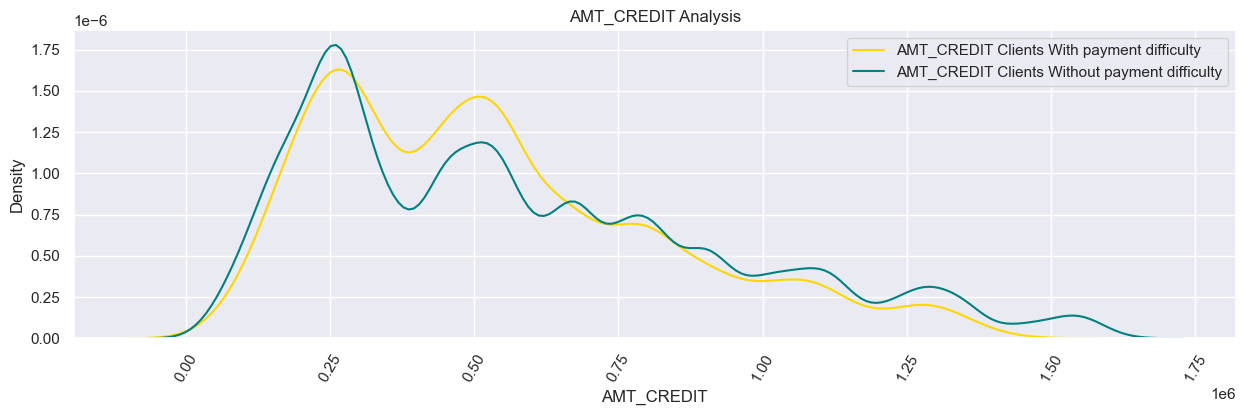

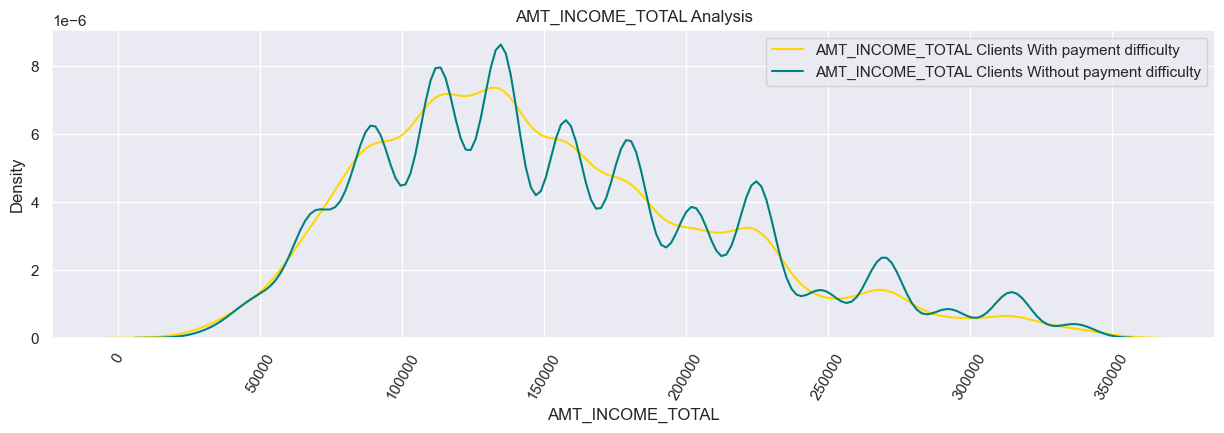

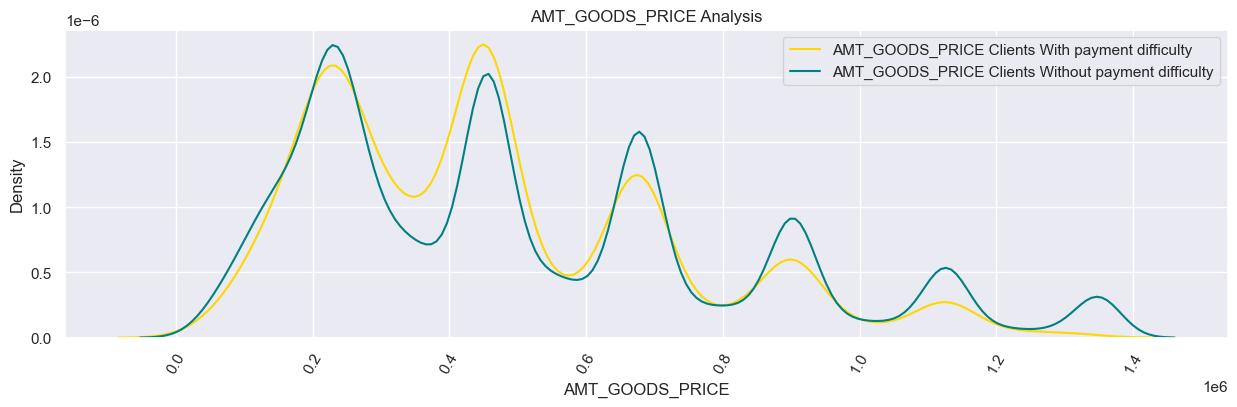

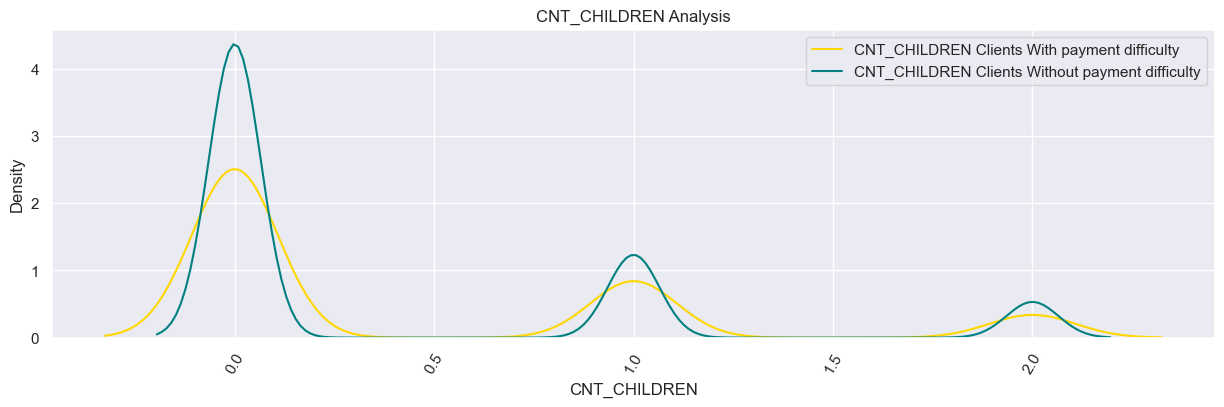

In [39]:
plot =['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','CNT_CHILDREN']

for i in plot: 
    
    # removing outliers
    df_WithDiff_Q1 = df_WithDiff[i].quantile(0.25)
    df_WithDiff_Q3 = df_WithDiff[i].quantile(0.75)
    df_WithDiff_IQR = df_WithDiff_Q3-df_WithDiff_Q1
    UF_WithDiff = df_WithDiff_Q3+1.5*df_WithDiff_IQR
    
    df_WithoutDiff_Q1 = df_WithoutDiff[i].quantile(0.25)
    df_WithoutDiff_Q3 = df_WithoutDiff[i].quantile(0.75)
    df_WithoutDiff_IQR = df_WithoutDiff_Q3-df_WithoutDiff_Q1
    UF_WithoutDiff= df_WithoutDiff_Q3+1.5*df_WithoutDiff_IQR
    
    # plotting hist+kde plot
    sb.set(font_scale=1)
    plt.figure(figsize=[15,4])
    #plt.subplot(1,2,1)
    #print(df_WithDiff[i].value_counts())
    plt.title(i+' Analysis')
    sb.distplot(df_WithDiff[df_WithDiff[i] <= UF_WithDiff][i],
                label=i+' Clients With payment difficulty', hist = False,color='gold')
    
    sb.distplot(df_WithoutDiff[df_WithoutDiff[i] <= UF_WithoutDiff][i],
                label=i+' Clients Without payment difficulty', hist = False,color='teal')
    plt.xticks(rotation=60)
    plt.legend()
    plt.show()

_Observations_  
 -> 6,00,000> AMT_CREDIT > 2,00,000 there are more loanees with payment difficulties.
 
 -> AMT_CREDIT > 7,50,000 there are more loanees with on-time payment difficulties.
 
 -> For 2,00,000> AMT_GOODS_PRICE > 4,50,000 there are more loanees with payment difficulties.
 
 -> CNT_CHILDREN =0 there are many loanees with on-time payments.
 
 -> With CNT_CHILDREN=1/2, the count of on-time payments reduces.
 
 -> AMT_INCOME_TOTAL curve is slightly right-skewed, showing that 1,00,000< AMT_INCOME_TOTAL < 1,50,000 
    i.e. lower income range, has max defaulters.

### Bivariate Analysis

In [40]:
# Function for removing outliers
def outliers(df,col):
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR = Q3-Q1
    Min = (Q1-1.5*IQR)
    Max = (Q3+1.5*IQR)
    return(Max)

In [41]:
# AMT_GOODS_PRICE v/s AMT_CREDIT

In [42]:
Max_AMT_GOODS_PRICE_WithDelay = outliers(df_WithDiff,'AMT_GOODS_PRICE')
Max_AMT_AMT_CREDIT_WithDelay  = outliers(df_WithDiff,'AMT_CREDIT')

Max_AMT_GOODS_PRICE_WithoutDelay = outliers(df_WithoutDiff,'AMT_GOODS_PRICE')
Max_AMT_AMT_CREDIT_WithoutDelay  = outliers(df_WithoutDiff,'AMT_CREDIT')

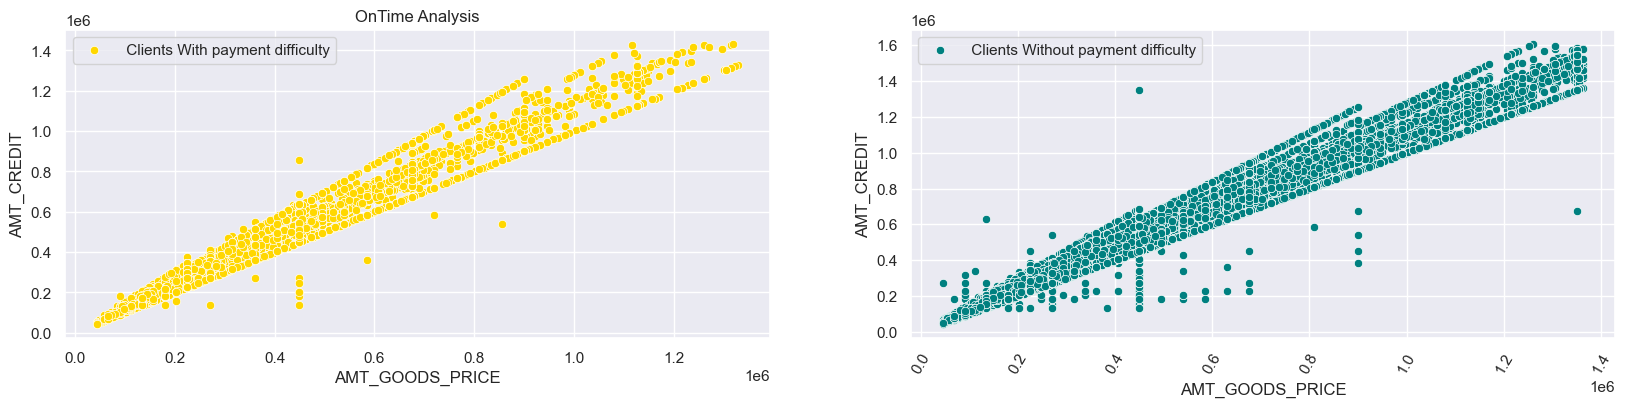

In [43]:
    # plotting scatter plot
    sb.set(font_scale=1)
    plt.figure(figsize=[20,4])
    plt.subplot(1,2,1)
    plt.title('With Delay Analysis')
    sb.scatterplot(x=df_WithDiff[df_WithDiff['AMT_GOODS_PRICE'] <= Max_AMT_GOODS_PRICE_WithDelay]['AMT_GOODS_PRICE'],
                   y=df_WithDiff[df_WithDiff['AMT_CREDIT'] <= Max_AMT_AMT_CREDIT_WithDelay]['AMT_CREDIT'],
                label=' Clients With payment difficulty',color='gold')
    
    plt.title('OnTime Analysis')
    plt.subplot(1,2,2) 
    sb.scatterplot(x=df_WithoutDiff[df_WithoutDiff['AMT_GOODS_PRICE'] <= Max_AMT_GOODS_PRICE_WithoutDelay]['AMT_GOODS_PRICE'],
                   y=df_WithoutDiff[df_WithoutDiff['AMT_CREDIT'] <= Max_AMT_AMT_CREDIT_WithoutDelay]['AMT_CREDIT'],
                label=' Clients Without payment difficulty',color='teal')
    plt.xticks(rotation=60)
    plt.legend()
    plt.show()

Observations:  
-> AMT_GOODS_PRICE & AMT_CREDIT, have strong positive correlation.

In [44]:
# AMT_GOODS_PRICE v/s AMT_INCOME_TOTAL

In [45]:
Max_AMT_GOODS_PRICE_WithDelay = outliers(df_WithDiff,'AMT_GOODS_PRICE')
Max_AMT_INCOME_TOTAL_WithDelay  = outliers(df_WithDiff,'AMT_INCOME_TOTAL')

Max_AMT_GOODS_PRICE_WithoutDelay = outliers(df_WithoutDiff,'AMT_GOODS_PRICE')
Max_AMT_INCOME_TOTAL_WithoutDelay  = outliers(df_WithoutDiff,'AMT_INCOME_TOTAL')

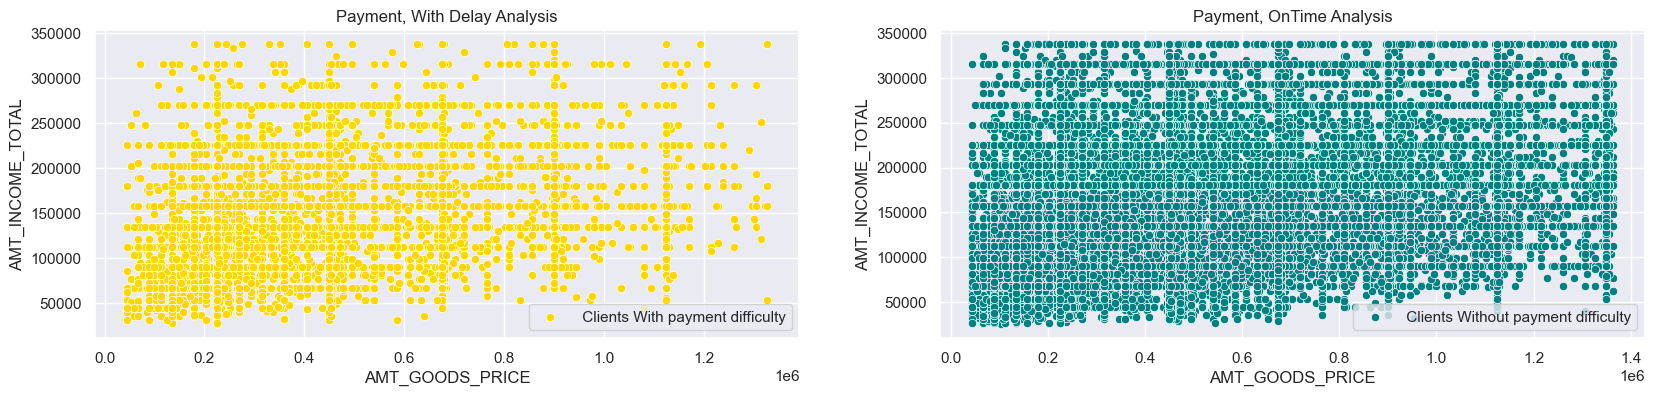

In [46]:
    # plotting scatter plot
    sb.set(font_scale=1)
    plt.figure(figsize=[20,4])
    plt.subplot(1,2,1)
    plt.title('Payment, With Delay Analysis')
    sb.scatterplot(x=df_WithDiff[df_WithDiff['AMT_GOODS_PRICE'] <= Max_AMT_GOODS_PRICE_WithDelay]['AMT_GOODS_PRICE'],
                   y=df_WithDiff[df_WithDiff['AMT_INCOME_TOTAL'] <= Max_AMT_INCOME_TOTAL_WithDelay]['AMT_INCOME_TOTAL'],
                label=' Clients With payment difficulty',color='gold')
    
    
    plt.subplot(1,2,2) 
    sb.scatterplot(x=df_WithoutDiff[df_WithoutDiff['AMT_GOODS_PRICE'] <= Max_AMT_GOODS_PRICE_WithoutDelay]['AMT_GOODS_PRICE'],
                   y=df_WithoutDiff[df_WithoutDiff['AMT_INCOME_TOTAL'] <= Max_AMT_INCOME_TOTAL_WithoutDelay]['AMT_INCOME_TOTAL'],
                label=' Clients Without payment difficulty',color='teal')
    plt.title('Payment, OnTime Analysis')
    plt.show()

In [47]:
# DAYS_EMPLOYED v/s AMT_INCOME_TOTAL

In [48]:
Max_AMT_DAYS_EMPLOYED_WithDelay = outliers(df_WithDiff,'DAYS_EMPLOYED')
Max_AMT_INCOME_TOTAL_WithDelay  = outliers(df_WithDiff,'AMT_INCOME_TOTAL')

Max_AMT_DAYS_EMPLOYED_WithoutDelay = outliers(df_WithoutDiff,'DAYS_EMPLOYED')
Max_AMT_INCOME_TOTAL_WithoutDelay  = outliers(df_WithoutDiff,'AMT_INCOME_TOTAL')

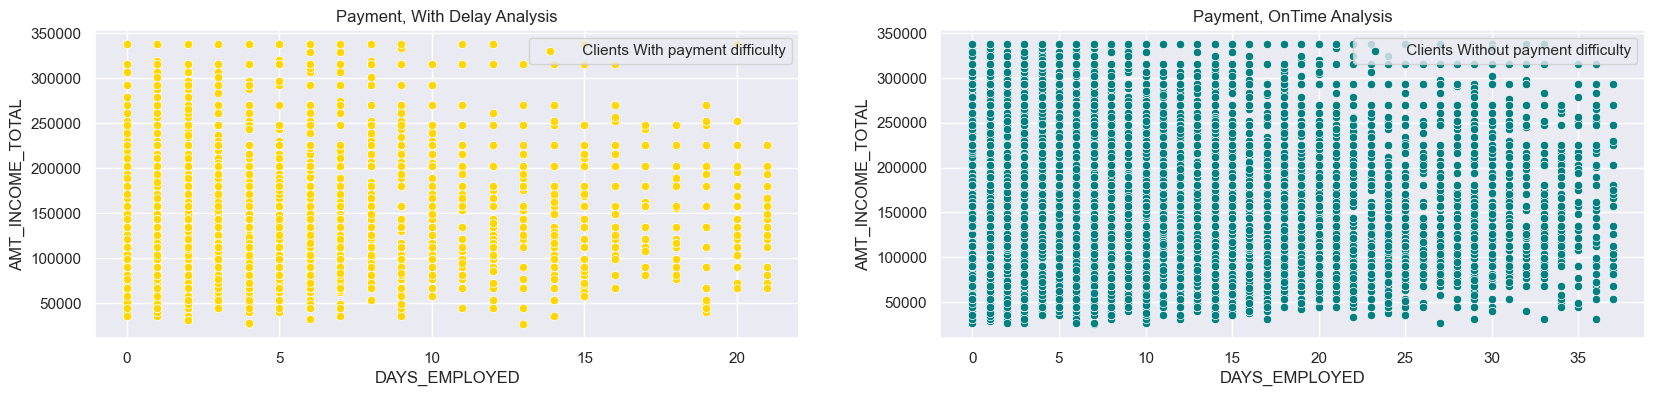

In [49]:
    # plotting scatter plot
    sb.set(font_scale=1)
    plt.figure(figsize=[20,4])
    plt.subplot(1,2,1)
    plt.title('Payment, With Delay Analysis')
    sb.scatterplot(x=df_WithDiff[df_WithDiff['DAYS_EMPLOYED'] <= Max_AMT_DAYS_EMPLOYED_WithDelay]['DAYS_EMPLOYED'],
                   y=df_WithDiff[df_WithDiff['AMT_INCOME_TOTAL'] <= Max_AMT_INCOME_TOTAL_WithDelay]['AMT_INCOME_TOTAL'],
                label=' Clients With payment difficulty',color='gold')
    
    
    plt.subplot(1,2,2) 
    sb.scatterplot(x=df_WithoutDiff[df_WithoutDiff['DAYS_EMPLOYED'] <= Max_AMT_DAYS_EMPLOYED_WithoutDelay]['DAYS_EMPLOYED'],
                   y=df_WithoutDiff[df_WithoutDiff['AMT_INCOME_TOTAL'] <= Max_AMT_INCOME_TOTAL_WithoutDelay]['AMT_INCOME_TOTAL'],
                label=' Clients Without payment difficulty',color='teal')
    plt.title('Payment, OnTime Analysis')
    plt.legend()
    plt.show()

Observations:  
-> Loanees with days_employed > 10 years  
   Defaulters: Distribution is sparse- very few employees are having difficulty.
   
-> Loanees with days_employed > 20 years  
   On-Time: This data is present in On-time payments distribution. But missing in defaulters.
   

In [52]:
# Generic function to display percentage above bars in graphs.

def per_abv_bar1(col1,col2,col,ax):

    c = pd.crosstab(col1,col2)  # for getting counts of yes/no attrition values, based on the col specified.
    x=pd.merge(col,c, left_index=True, right_index=True)
    #x=x.drop([col1],axis=1)
    count=1
    l=[]
    #print(x)
    for i in x.values:  
        l.append((i[1]/(i[0]+i[1])*100).round())   
        l.append((i[0]/(i[0]+i[1])*100).round())   
    
    percentage=np.reshape(l,newshape=(len((c.index).to_list()),len((c.columns).to_list())))
    #print(percentage)
    for bars in ax.containers:
        
        for i, p in enumerate(bars):
            #print(p)
            formt=f'{percentage[i][count]:.1f}%'             
            ax.annotate(formt, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center')   # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle        
                
        count-=1


In [53]:
# OCCUPATION_TYPE v/s TARGET v/s GENDER

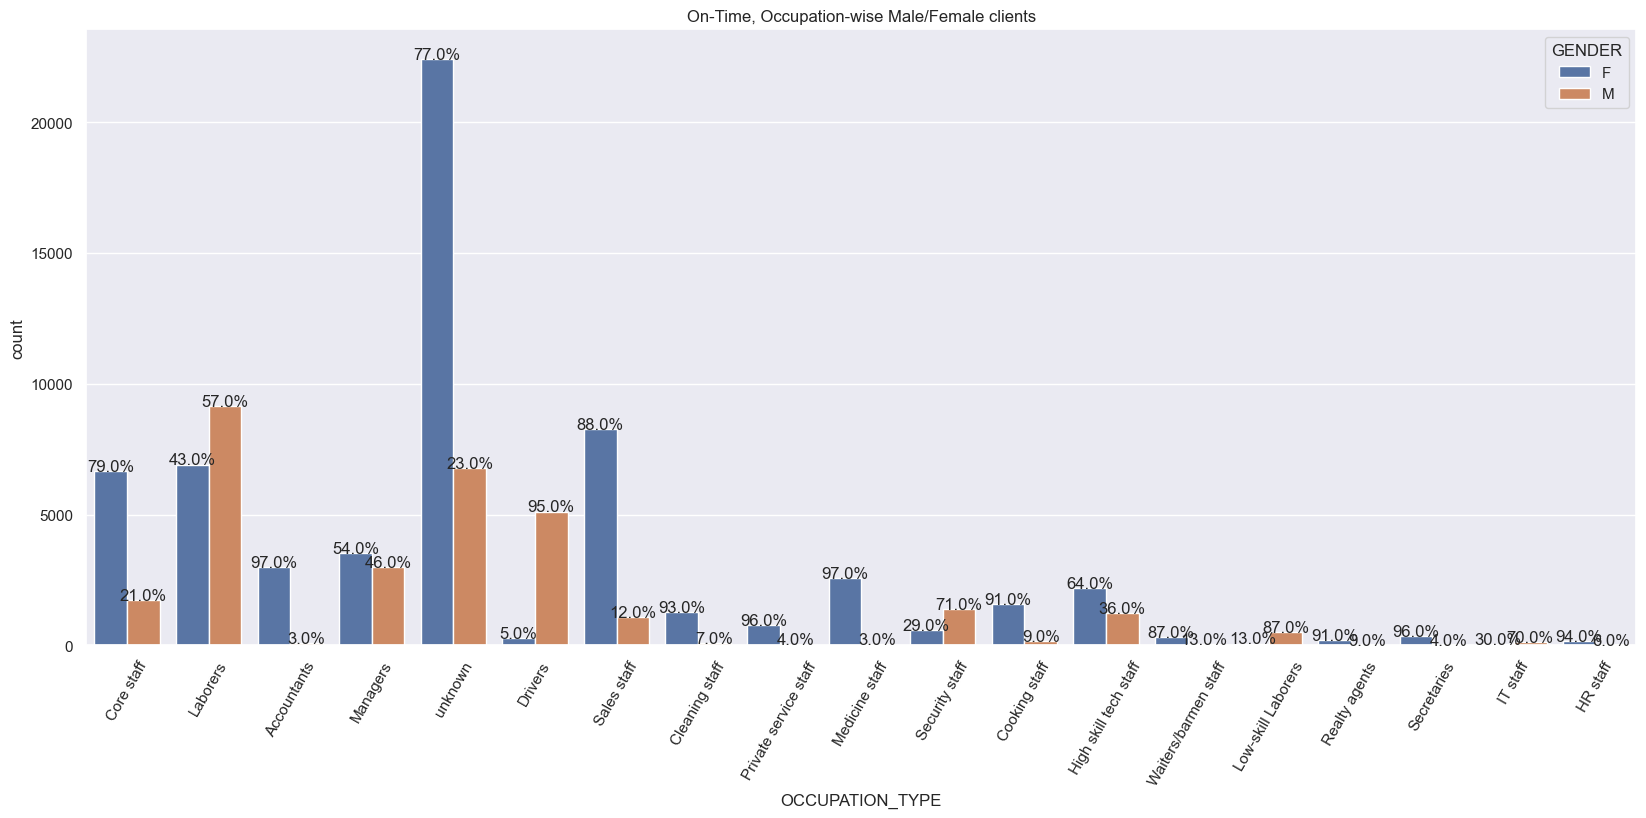

'\nfig, axes = plt.subplots(1, figsize=(20, 8))\nsb.countplot(data=df_WithDiff,x=\'OCCUPATION_TYPE\',hue=\'GENDER\',ax=axes)\nplt.xticks(rotation=60)\naxes.set(title="With Delay, Occupation-wise Male/Female clients")\nper_abv_bar1(df_WithoutDiff[\'OCCUPATION_TYPE\'],df_WithoutDiff[\'GENDER\'],col,axes)     # call generic fn to display % on bars\nplt.show()\n'

In [54]:
col = pd.DataFrame(index=['Core staff', 'Laborers','Accountants', 'Managers', 'unknown',
       'Drivers', 'Sales staff', 'Cleaning staff', 
       'Private service staff', 'Medicine staff', 'Security staff','Cooking staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff','HR staff'])

fig, axes = plt.subplots(1, figsize=(20, 8))
sb.set(font_scale=1)
sb.countplot(data=df_WithoutDiff,x='OCCUPATION_TYPE',hue='GENDER',ax=axes)
plt.xticks(rotation=60)
axes.set(title="On-Time, Occupation-wise Male/Female clients")
per_abv_bar1(df_WithoutDiff['OCCUPATION_TYPE'],df_WithoutDiff['GENDER'],col,axes)     # call generic fn to display % on bars
plt.show()


'''
fig, axes = plt.subplots(1, figsize=(20, 8))
sb.countplot(data=df_WithDiff,x='OCCUPATION_TYPE',hue='GENDER',ax=axes)
plt.xticks(rotation=60)
axes.set(title="With Delay, Occupation-wise Male/Female clients")
per_abv_bar1(df_WithoutDiff['OCCUPATION_TYPE'],df_WithoutDiff['GENDER'],col,axes)     # call generic fn to display % on bars
plt.show()
'''


Observations:  
-> Female clients who are working are more likely to make On-Time payments

In [55]:
# NAME_INCOME_TYPE v/s TARGET` v/s GENDER

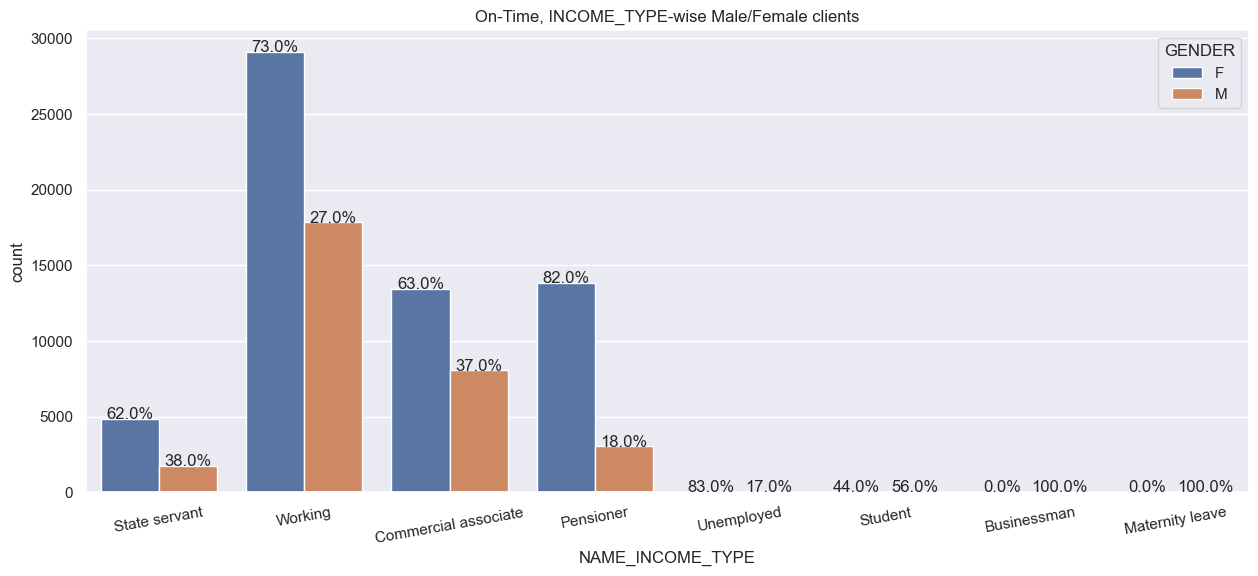

In [56]:
col = pd.DataFrame(index=['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'])

fig, axes = plt.subplots(1, figsize=(15, 6))
sb.set(font_scale=1)
sb.countplot(data=df_WithoutDiff,x='NAME_INCOME_TYPE',hue='GENDER',ax=axes)
plt.xticks(rotation=10)
axes.set(title="On-Time, INCOME_TYPE-wise Male/Female clients")
per_abv_bar1(df_WithoutDiff['NAME_INCOME_TYPE'],df_WithoutDiff['GENDER'],col,axes)     # call generic fn to display % on bars
plt.show()

Observations:  
-> Female clients who are educated are more likely to make On-Time payments

In [57]:
# NAME_EDUCATION_TYPE v/s TARGET` v/s GENDER

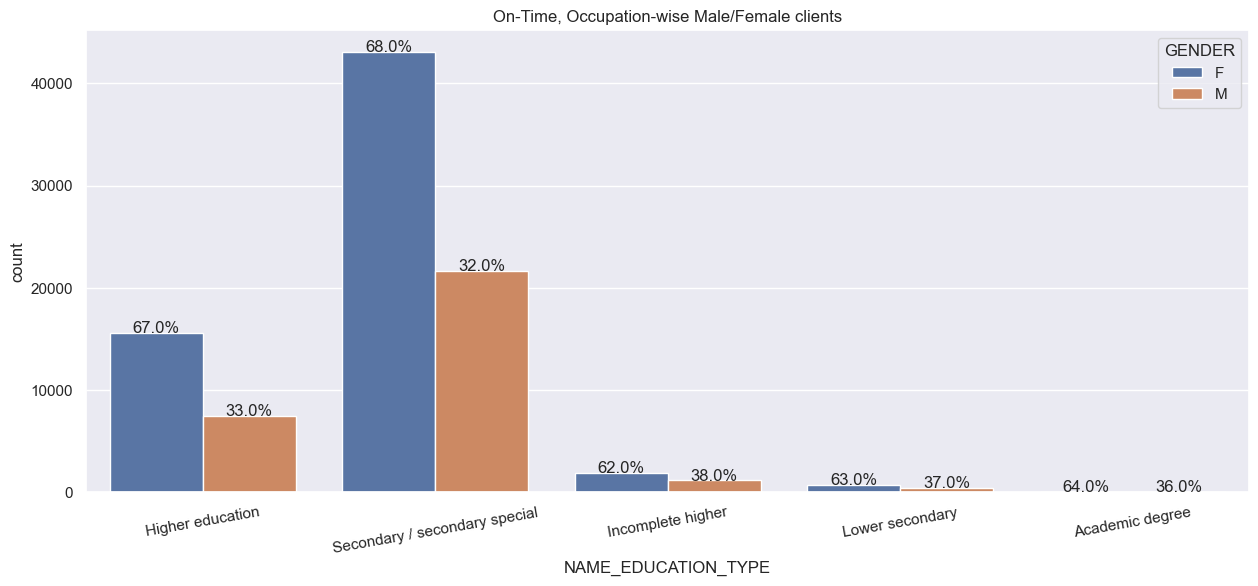

In [58]:
col = pd.DataFrame(index=['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'])

fig, axes = plt.subplots(1, figsize=(15, 6))
sb.set(font_scale=1)
sb.countplot(data=df_WithoutDiff,x='NAME_EDUCATION_TYPE',hue='GENDER',ax=axes)
plt.xticks(rotation=10)
axes.set(title="On-Time, Occupation-wise Male/Female clients")
per_abv_bar1(df_WithoutDiff['NAME_EDUCATION_TYPE'],df_WithoutDiff['GENDER'],col,axes)     # call generic fn to display % on bars
plt.show()

Observations:  
-> Female clients who are educated are more likely to make On-Time payments

In [59]:
# NAME_EDUCATION_TYPE v/s AMT_CREDIT` v/s GENDER

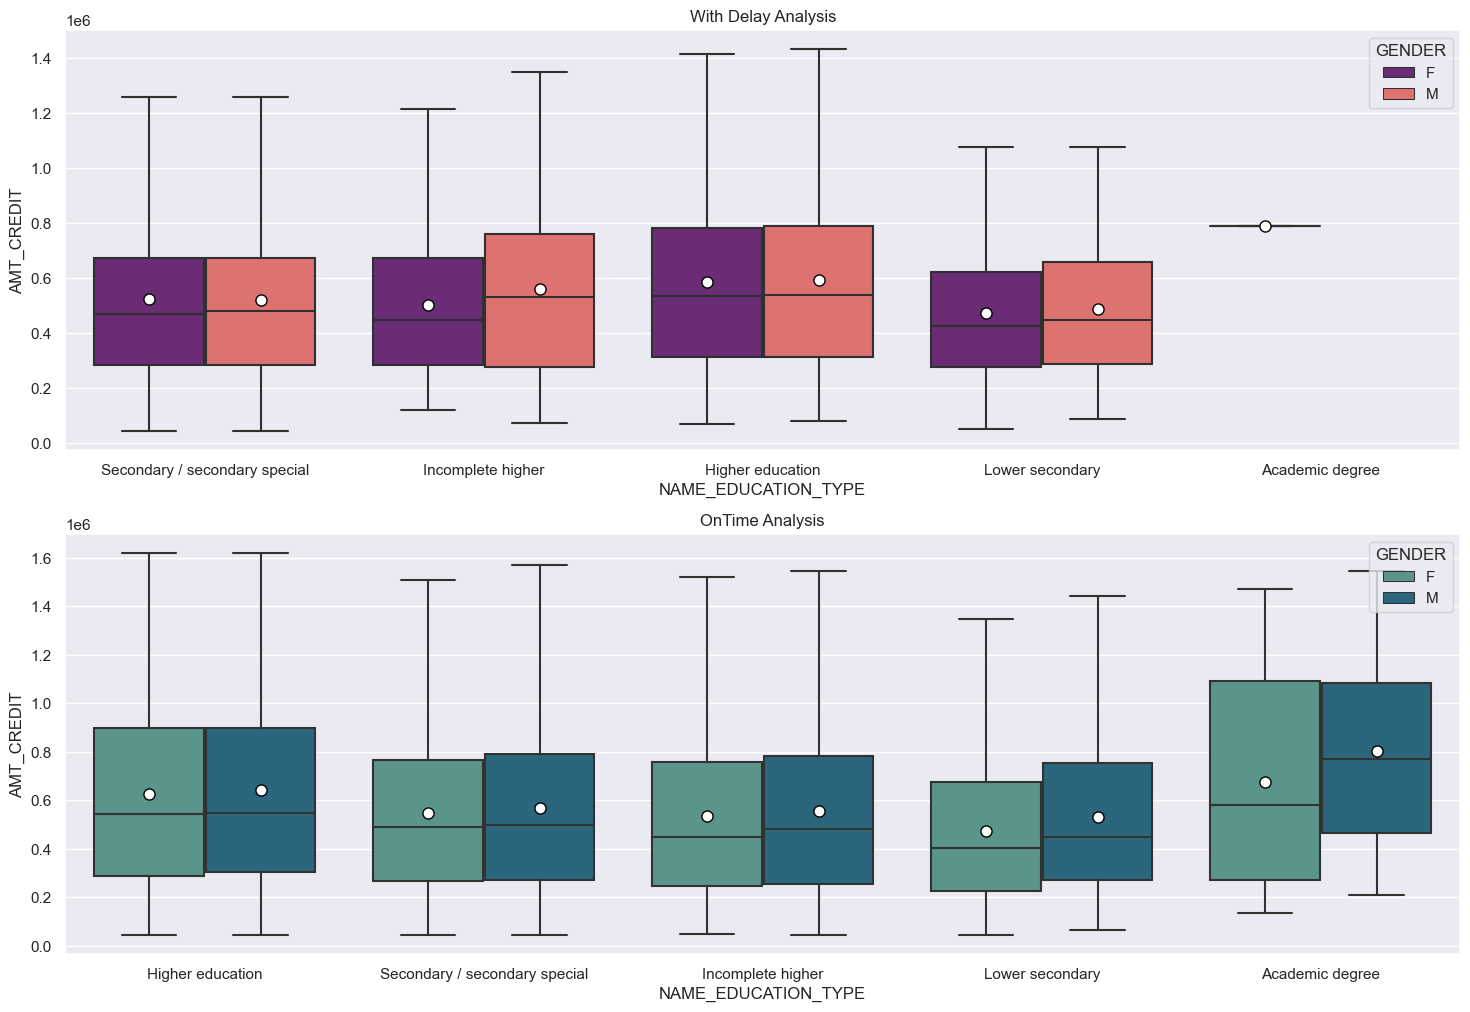

In [60]:
    df_WithoutDiff = df[df['TARGET']==0]
    df_WithDiff = df[df['TARGET']==1]
# plotting box plot
    sb.set(font_scale=1)
    plt.figure(figsize=[18,12])
    plt.subplot(2,1,1)
    plt.title('With Delay Analysis')
    sb.boxplot(x=df_WithDiff['NAME_EDUCATION_TYPE'],
               y=df_WithDiff[df_WithDiff['AMT_CREDIT'] <= Max_AMT_AMT_CREDIT_WithDelay]['AMT_CREDIT'],
                palette='magma',showfliers=False,showmeans=True, meanprops={'marker':'o','markerfacecolor':'white', 
                       'markeredgecolor':'black','markersize':'8'},hue=df_WithDiff['GENDER'],hue_order=['F','M'])
    
    plt.subplot(2,1,2) 
    plt.title('OnTime Analysis')
    sb.boxplot(x=df_WithoutDiff['NAME_EDUCATION_TYPE'],
                y=df_WithoutDiff[df_WithoutDiff['AMT_CREDIT'] <= Max_AMT_AMT_CREDIT_WithoutDelay]['AMT_CREDIT'],
                palette='crest',showfliers=False,showmeans=True, meanprops={'marker':'o','markerfacecolor':'white', 
                       'markeredgecolor':'black','markersize':'8'},hue=df_WithoutDiff['GENDER'])
    plt.show()

Observations:  
-> AMT_CREDIT is highest among Loanees with Academic degree, esp. Females.  
-> They don't show up on the Defaulter's graph, they must be making payments on-time.

In [61]:
# IncomeGroup v/s AMT_CREDIT v/s Gender

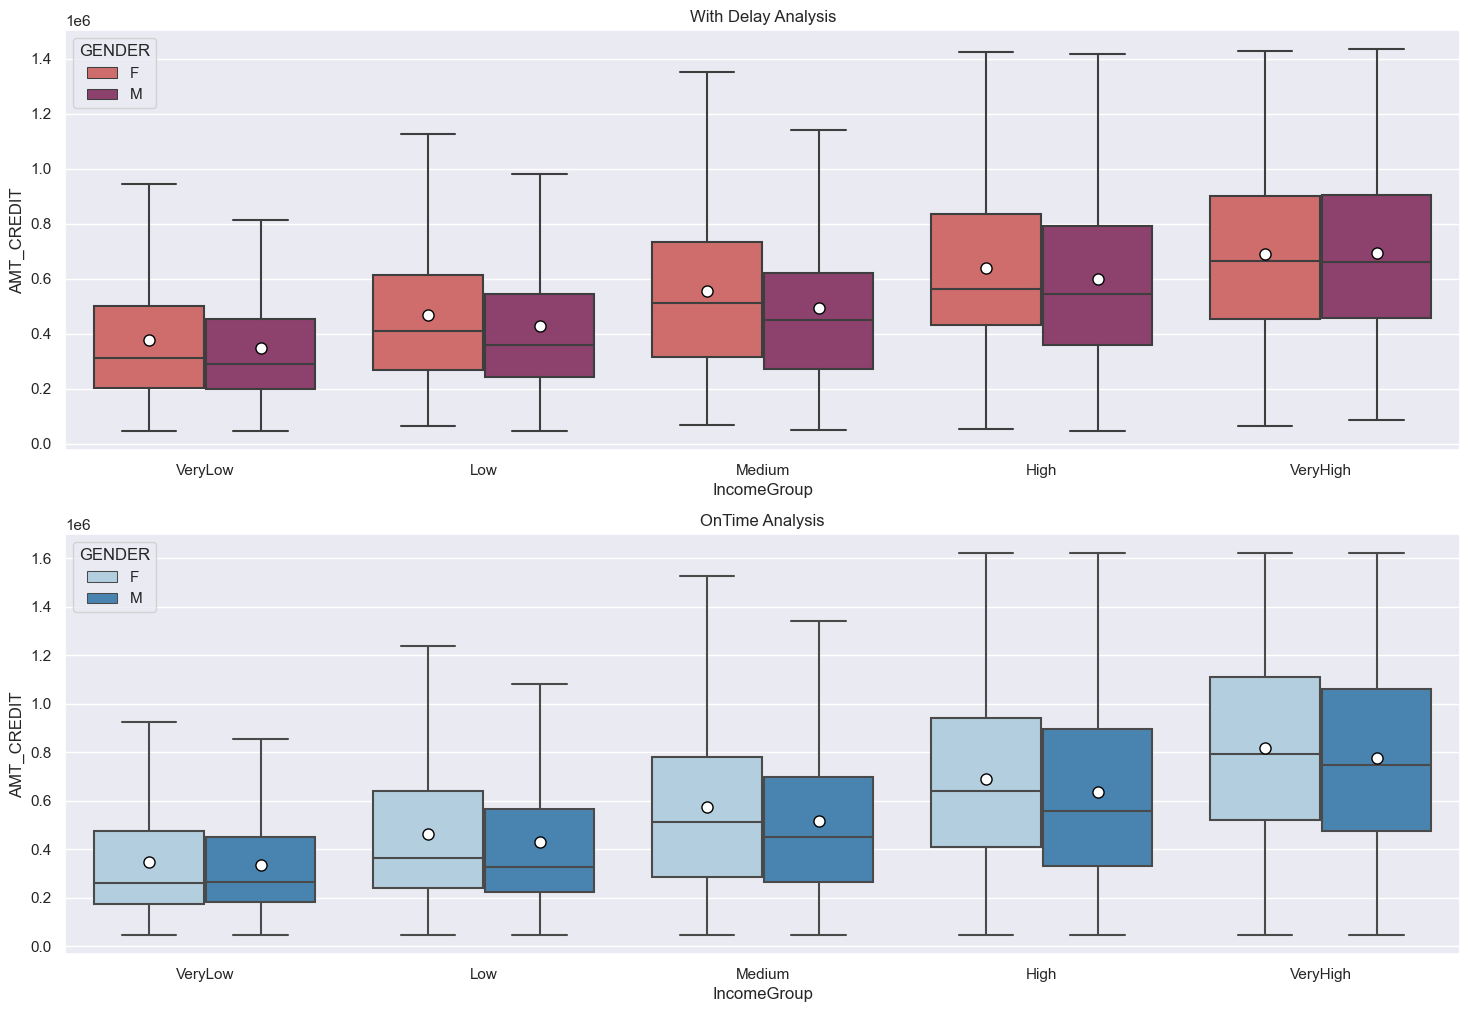

In [62]:
# plotting box plot
sb.set(font_scale=1)
plt.figure(figsize=[18,12])
plt.subplot(2,1,1)
plt.title('With Delay Analysis')
sb.boxplot(x=df_WithDiff['IncomeGroup'],
               y=df_WithDiff[df_WithDiff['AMT_CREDIT'] <= Max_AMT_AMT_CREDIT_WithDelay]['AMT_CREDIT'],
                palette='flare',showfliers=False,showmeans=True, meanprops={'marker':'o','markerfacecolor':'white', 
                       'markeredgecolor':'black','markersize':'8'},hue=df_WithDiff['GENDER'],hue_order=['F','M'])
    
plt.subplot(2,1,2) 
plt.title('OnTime Analysis')
sb.boxplot(x=df_WithoutDiff['IncomeGroup'],
                y=df_WithoutDiff[df_WithoutDiff['AMT_CREDIT'] <= Max_AMT_AMT_CREDIT_WithoutDelay]['AMT_CREDIT'],
                palette='Blues',showfliers=False,showmeans=True, meanprops={'marker':'o','markerfacecolor':'white', 
                       'markeredgecolor':'black','markersize':'8'},hue=df_WithoutDiff['GENDER'])
plt.show()

Observations:  
-> AMT_CREDIT is highest in VeryHigh income groups.  
-> And lowest among VeryLow income groups.  
-> Among all category AMT_CREDIT is higher in Females.

In [63]:
# IncomeGroup v/s TARGET

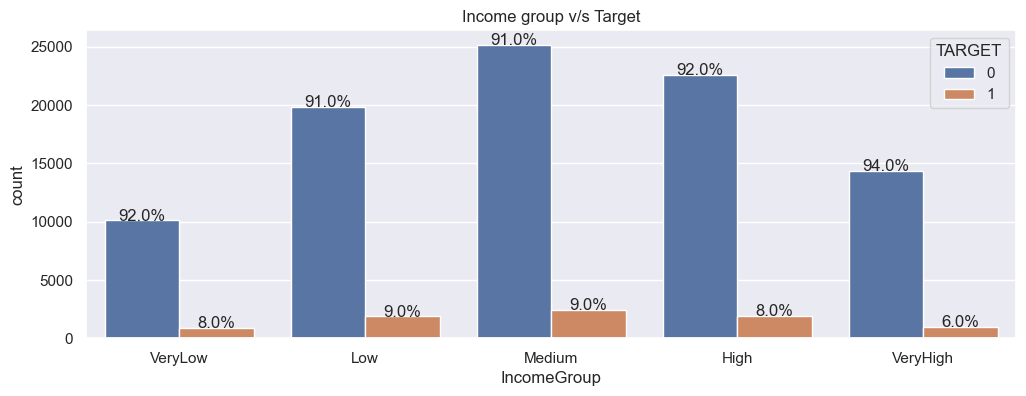

In [64]:
    col = pd.DataFrame(index=['VeryLow','Low', 'Medium','High', 'VeryHigh'])
    sb.set(font_scale=1)
    fig, axes = plt.subplots(1, figsize=(12, 4))   
    plt.title('Income group v/s Target')
    sb.countplot(x=df['IncomeGroup'],hue=df['TARGET'], ax=axes)
    per_abv_bar1(df['IncomeGroup'],df['TARGET'],col,axes) 

Observations:  
-> By this graph we can infer that default rate among High & VeryHigh income groups is 14% combined which can adversely        affect the business, as credit amt is on the higher side too, for these groups.

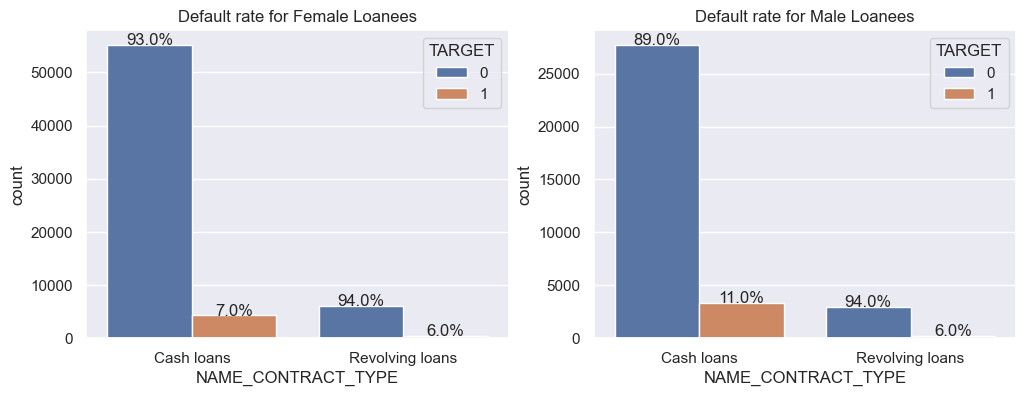

In [65]:
# GENDER v/s TARGET

# for female loanees
d1=df[df['GENDER']=='F']
fig, axes = plt.subplots(1,2, figsize=(12, 4))
col = pd.DataFrame(index=['Cash loans', 'Revolving loans'])

sb.set(font_scale=1)
sb.countplot(data=d1,x='NAME_CONTRACT_TYPE',hue='TARGET',ax=axes[0],hue_order=[0,1])
axes[0].set(title="Default rate for Female Loanees")
per_abv_bar1(d1['NAME_CONTRACT_TYPE'],d1['TARGET'],col,axes[0])     # call generic fn to display % on bars


# for male loanees
d2=df[df['GENDER']=='M']
sb.set(font_scale=1)
sb.countplot(data=d2,x='NAME_CONTRACT_TYPE',hue='TARGET',ax=axes[1],hue_order=[0,1])
axes[1].set(title="Default rate for Male Loanees")
per_abv_bar1(d2['NAME_CONTRACT_TYPE'],d2['TARGET'],col,axes[1])     # call generic fn to display % on bars
plt.show()


Observations:  
-> There are more male defaulters.  
-> Default rate is higher for Cash loans for both males and females.

In [66]:
# Heatmap to analyse the relationship of IncomeGroup with AMT_CREDIT & AMT_GOODS_PRICE

<Figure size 1200x1200 with 0 Axes>

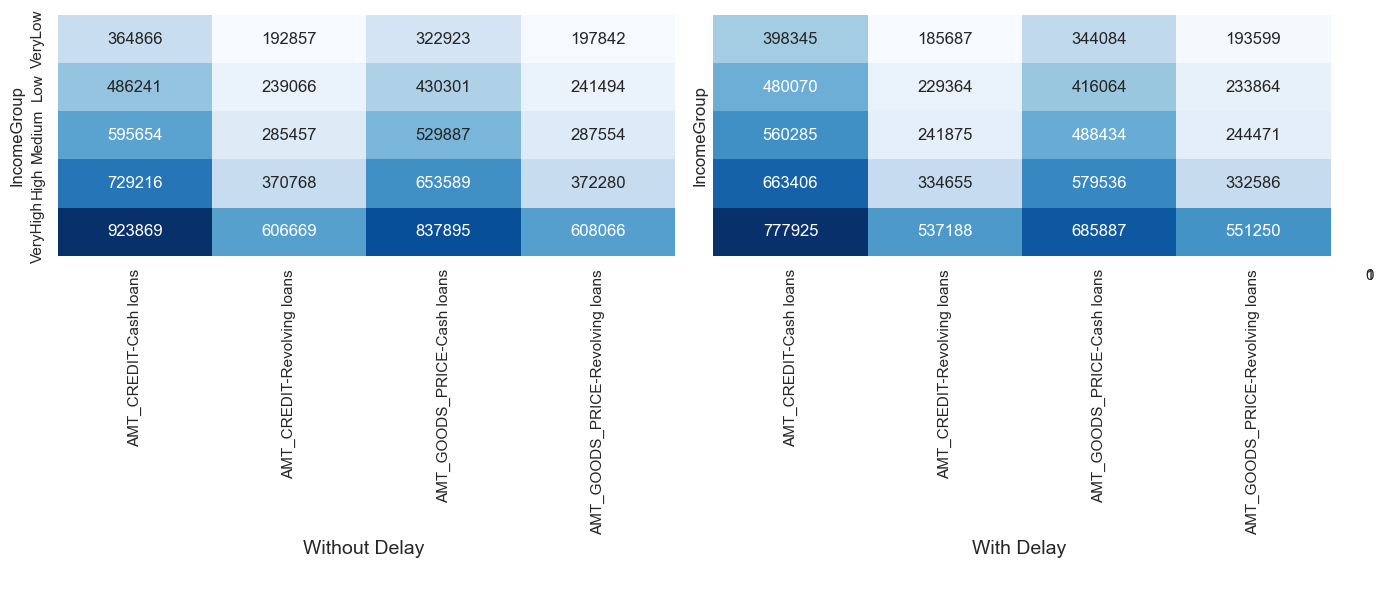

In [67]:
# Analysing relationship of IncomeGroup with AMT_CREDIT & AMT_GOODS_PRICE

plt.figure(figsize=[12,12])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))

res=pd.pivot_table(data=df_WithoutDiff, index="IncomeGroup",columns="NAME_CONTRACT_TYPE",
                   values=['AMT_GOODS_PRICE','AMT_CREDIT'], aggfunc="mean")
c=sb.heatmap(res, annot=True,cmap='Blues', fmt="g", ax=ax1, cbar=False)
c.set_xlabel('Without Delay \n', fontsize=14,fontweight= 7)

res1=pd.pivot_table(data=df_WithDiff, index="IncomeGroup",columns="NAME_CONTRACT_TYPE",
                    values=['AMT_GOODS_PRICE','AMT_CREDIT'], aggfunc="mean")
c1=sb.heatmap(res1, annot=True,cmap='Blues', fmt="g", ax=ax2, cbar=False)
c1.set_xlabel('With Delay \n', fontsize=14,fontweight= 7)
plt.tight_layout()
plt.show()

Observations:  
-> Cash loans in Very High income group has high amount credit. This could lead to loss for business.

### Conclusion:  

-> Client categories _less likely to default_:  
Clients who are employed for >= 20 years.  
Female clients who are working. Female applicants should be given extra weightage as defaults are lesser. 
Clients who are Married/Widowed.  
Female & Male clients with Academic degree.  
Students and Business mean have no problem in repayment of the loan.

-> Client categories _more likely to default_:  
Medium income    
Male  
Unemployed  
Labourers, Salesman, Drivers  
Own House - No  
Amount income not correspondingly equivalent to Good Bought – Income 'Low' and 'High' is a concern  
